C:\Users\Queensha\anaconda3\envs\terserah\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3 -8.962782874538942 0.3419774478294873
   Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             1.0              0.9989   
1            1             0.0              0.9996   
2            2             0.0              0.9997   
3            3             1.0              0.9998   
4            4             0.0              0.9999   
5            5             0.0              0.9661   
6            6             0.0              0.9985   
7            7             0.0              0.9303   
8            8             2.0              0.9996   
9            9             0.0              0.9997   

                                            Keywords  \
0  covidindonesia, kesehatan, ppkm, covid19, juga...   
1  covidindonesia, covid_19, kerumunan, covid19, ...   
2  covidindonesia, covid_19, kerumunan, covid19, ...   
3  covidindonesia, kesehatan, ppkm, covid19, juga...   
4  covidindonesia, covid_19, kerumunan, covid19, ...   
5  covidindonesia, covid_19, 

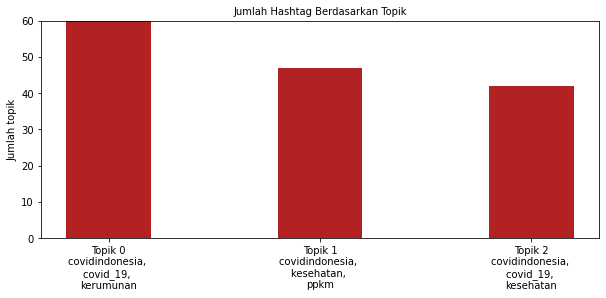

In [32]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from gensim.models.coherencemodel import CoherenceModel
import re
import pyLDAvis.gensim_models
import pickle 
import numpy as np, pandas as pd
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

random_state = 0 

doc_set = """
rioalexsandroSelama sepekan terakhir kasus kematian harian di Indonesia terus meningkat,Bahkan se Asia Indonesia peringkat ke 2 setelah India#covid19 #covidindonesia #pandemic #coronaindonesia2w
#URinfo - Indonesia mendapat bantuan berupa 200 ventilator, 256 tabung oksigen kosong ukuran 40 liter dari Singapura untuk mempercepat penanggulangan COVID-19.Alat tersebut dibawa menggunakan dua pesawat Singapore Air Force C130 telah tiba di Bandara Halim Perdana Kusuma, Jakarta pada hari Jumat kemarin.--Temukan berita lainnya di â â €â Twitter @urbanasiacomâ â €â TikTok @urbanasiacomYouTube urbanasiacomâ â €â Facebook Urbanasiacomâ â €â www.urbanasia.comâ â €---â #urbanasia #urbanasiamedia #urbanasiajkt #takutkudet#covidindonesia #bantuan #alatkesehatan #oksigen #tabungoksigen #singapore #singapur1d
Judul Lagunya Mawthini ( Tanah Airku )Ø§Ù„Ø¥Ù…Ø§Ù… Ø§Ù„Ø¹Ø§Ø¯Ù„ Ù‚ÙˆØ§Ù… ÙƒÙ„ Ù…Ø§Ø¦Ù„ ÙˆØµÙ„Ø§Ø­ ÙƒÙ„ ÙØ§Ø³Ø¯ ÙˆÙ‚ØµØ¯ ÙƒÙ„ Ø¬Ø§Ø¦Ø± ÙˆÙ†ØµØ±Ø© ÙƒÙ„ Ù…Ø¸Ù„ÙˆÙ…Seorang pemimpin yg adil adalah penguasa yg mampu menegakkan setiap perkara yg bengkok, memperbaiki setiap perkara yg rusak, mencegah setiap kezhaliman, dan menolong siapapun yg dizhalimi.Melarang Aktivitas Tanpa Memberikan Solusi Hidup adalah ketimpangan. Menghindari kerumunan dengan kerumunan yang lebih besar. Kasihan aparatur negara di benturkan dengan rakyat kecil ðŸ¥²Pak, kita sama-sama capek ðŸ¥²Menurut kalian gimana?Share#covid19 #corona #palestine #palestina #palestineðŸ‡µðŸ‡¸ #savepalestine #palestinaindonesia #storytime #sejarah #indonesiaku #jakartaselatan #bandunghits_ #muslimmovementindonesia #israelkoyak#coronaviruspandemic#covid_19#pray #qunutnazilah #savetheplanet #protokolkesehatan #indonesiabertauhid #covidindonesia #vaksin12h
Corona makin menggila.. Semoga ini bermanfaat yahSejumlah cara lain untuk mengaktifkan sistem imun tubuh. Salah satunya menjaga pola makan dengan gizi seimbang.Selain itu, minum air putih sedikitnya 6 gelas/hari, olahraga setidaknya 3 kali dalam seminggu minimal 30 menit, dan menjaga kebersihan tubuh secara keseluruhan dengan mandi setiap hari.Tidak kalah penting, mencuci tangan dengan sabun atau handsanitizer setiap kali akan makan atau minum dan keluar dari kamar mandi, serta istirahat atau tidur yang cukup 6-8 jam/hari.Bagikan tips ini ke keluarga/teman/kerabat kalian.dapatkanMadu Murni dan Rempah Herbaldi @kampusmadu#jsrsehat #imuntubuh #covid #coronavirus #covidindonesia #immunitysistem #jagaimunitas #imunitastubuh #kampusmadu #jsrherbal #resepherbal #herbalcovid #obatcovid #infokesehatan #informasiupdate #updateinfo #infolengkapjsr #zaidulakbar #jsrresep #resepjsr #covidjsr #jintenhitam #ladahitamorganik #maduasli #manfaatmadu #manfatjinten #produkAllah1w
IG: @fuadbakh21 #fuadbeyDrone by @alivikryRIAU24.COM - Pembatasan itu biasanya disebut dengan 5M yakni memakai masker, mencuci tangan pakai sabun dan air mengalir, menjaga jarak, menjauhi kerumunan, dan membatasi mobilitasi dan interaksi.Permintaan ini disampaikannya dalam sebuah wawancara di TV One, Selasa, 6 Juli 2021."Masyarakat membatasi kegiatan yang biasa disebut dengan 5M," pintanya.Anies beranggapan, tujuan semua ini agar pandemi Covid-19 di Jakarta segera berakhir.Cara ini disebutnya dengan upaya penambalan. Dia menganalogikan ledakan Covid-19 ibaran rumah yang tengah mengalami kebocoran."Seperti atap rumah yang bocor, kami (pemerintah) siapkan ember yang menampung bocorannya. Tapi tidak bisa terus menerus kalau atapnya tidak di tambal," ujarnya."Cara menambalnya itu pemerintahnya melakukan tresing untuk menemukan kasus sehingga mereka (masyarakat) di isolasi lalu dirawat. Dari sisi masyarakat membatasi kegiatan yang biasa disebut dengan 5M. Jadi dua-duanya terjalin. Ini cara menambal," ujarnya.Permintaan ini lantaran kondisi rumah sakit di DKI Jakarta penuh sesak oleh pasien Covid-19."Jadi ini adalah sebelumnya, luar IGD (pasien membludak). Saya ingin mengatakan pada semua kami menyaksikan dari dekat. Ini bukan film, ini kenyataan," ujarnya."Dan tenaga medis disana bekerja pontang panting untuk menyelamatkan. Kalau kita tidak sama-sama bekerja, tidak akan bisa ini selesai," ujarnya.#ppkm #ppkmdarurat #ppkmjawabali #coronavirus #corona #coronaindonesia #covidindonesia #covid_19 #covid19 #aniesbaswedan #jokowi #kemenkes #satgas21h
Tidak henti-hentinya post mengenai immune booster.Karena memiliki sistem imun yang kuat adalah hal yang sangat penting, sekaligus kunci dalam melawan virus corona. Untuk itu, kamu perlu menaruh perhatian lebih pada upaya peningkatan sistem imun, agar terhindar dari COVID-19 dan penyakit berbahaya lainnya.IMMUNE BOOSTERBahan :- 300 ml air matang- 2 buah ibu jari jahe, kupas dan geprek- 1 ibu jari kunyit, kupas dan geprek- 1 Batang kayu manis atau 1 sdt kayu manis bubuk- 2 buah jeruk sunkist ( bisa diganti jeruk manis atau perasan lemon secukupnya)- 1 sdt maca (maca : gingseng asal Peru)- Raw honey ( madu murni) secukupnyaMasukkan jahe, kunyit, kayu manis, ke dalam panci, masak dengan 300ml air hingga panas ( tidak sampai mendidih) , angkat, kemudian saring, tunggu hingga hangat.Tambahkan jeruk sunkist, maca, dan raw honey, aduk rata siap disajikan.Dapatkan bahan Herbal dan Raw Honey di@kampusmadu@kampusmadu@kampusmaduManfaat :Melawan flu, demam, gangguan paru-paru, menghangatkan tubuh, meningkatkan sistem kekebalan tubuh, pengobatan kanker, tumor, gangguan kelenjar, masalah kewanitaan hingga sexual drink for male.Source resep buan_buana#jsr #jsrimun #jsrflu #jsrdemam #jsrtumor #jsr#zaidulakbar #jsrzaidulakbar #tehrempah #tehrimpang #zaidulakbarfanbase #imunjsr #immunitysistem #imunbooster #imuntubuh #jsrimun #resepboosteeimun #bonusbanyakjsr #bacaansehat #informasikesehatan #infowanita #informasiupdate #updatekesehatan #updateinfo #virus #coronavirus #covidindonesia #letsfightcoronavirus #zaidulakbarjsr #jsrimun3d
Serba-serbi tentang Covid - 19 yang dirangkum dari akun @ningzsppd ...#covid#covid_19#coviÌ‡d19#covidindonesia#dokterika#dokterikadevi#dokterpenyakitdalam4w
ðŸ””Pasien covid19 dengan nafas mulai terasa berat/sesak sementara stok oksigen habis danRS masih penuh dimana2 belum bisa melayani??âš ï¸Untuk smentara bisa kita selamatkan dulu dengan mengerjakan posisi tengkurap (proning) untuk membantu kebutuhan oksigen tubuhnya sambil menunggu bisa tertangani di RS.PleaseðŸ“ŒSave dan Share postingan ini buat sedulur yg lain yaðŸ™ðŸ¼âœ‰Smoga Allah menyelamatkan kita semua dari kondisi darurat covid19 iniAamiinðŸ¤²ðŸ½YRA______ ____ ___ __ __ _ _ _ _Untuk update tema2 kesehatan (terutama info pandemi + kesehatan THT -KL), bisa langsung pantau akun IG ini :@dr.muslimkasim@dr.muslimkasim#proning #proningposition #fightcovid19 #tengkurap #indonesialawancorona#pandemicovid19 #indonesialawancovid19 #obatcovid19 #infocovid19 #protokolkesehatan #viruscoronadiindonesia #wabahcorona #updatecovid19 #infocorona #pandemi #prokes #isolasimandiri #updateinfo #prokesuntukkitasemua #sarandokter #globalpandemic #covid19indonesia #stopcovid19 #covidindonesia #beritacorona #pakaimaskermu #edukasiinstagram #obatcorona #coronaindonesia1w
gak kerasa ya udah setahun, ada nemuin hoby/kebiasaan baru gak ?..follow @dagelanmusik jika kamu ingin lihat konten musik tiap saat ðŸ˜Š... ðŸŽ¥ : Youtube/Metro All Star. ðŸŽ™ : @jasonsambouw @fanimaulana @nikenriwu @margarethajo. ðŸŽµ : @gac_music - Berlari Tanpa Kaki.. sc : #pandemi #covid_19 #covid19 #corona #coronaindonesia #covidindonesia #covid19indonesia #indonesianidol #coronavirusmemesðŸ˜‚ðŸ˜‚ðŸ˜‚ #indonesianidolspecialseason #gac #berlaritanpakaki...#dagelan#dagelantv#dagelanmusik#dagelanvideo#dagelanregion18w
stay safe ya semua...--------@millenflorist melayani pemesanan karangan bunga papan dan berbagai macam rangkaian bunga yaa...--------Kita punya FREE ONGKIR lho untuk beberapa daerah di Indonesia--------âœ…Siap melayani pesanan pada hari Hâœ…melayani pengiriman seluruh indonesia--------For Order & Info :ðŸ“©WhatsApp : 082225324151ðŸ“žCall : 085777027456www.millenflorist.net / www.millenflorist.com--------#covid_19 #vaksin #covid #covidindonesia #covidindonesia #quotestentangbunga #quotesaboutlife #quotesdaily #qotd #qotdindonesia #quotesbungalavender #quotesbungamatahari #quotesbungamawar #quotesflower #bunga #mawar #quotesttgbunga #rangkaianbunga #bungastanding #bungameja #bungapapan4m
.#repost #covid_19 #covid #viraltiktok #covidindonesia #covid19indonesia #bestmemes #dankmemes #memesdialy #memegod #spicymemes #dailymeme #cringe #receh #garing #memesindonesia #lelucon #ngakak #lucu #viralindonesia #kocak #dagelanindonesia #TikTok #BikinRame13m
INFO TABUNG OKSIGEN!Dari twitter kang Soleh. Tujuan kita sama kok. Mau pandemi ini cepet kelar dan bisa hidup normal lagi. Jadi, ayo saling bantu kasih informasi buat yang lagi butuhin.Tulis dikolom komentar atau DM ke kami untuk informasi seputar jasa ambulance yang kalian punya, stay safe and stay at homeðŸ˜Šâœ¨--#TanamtumbuhMedia18m
Lets pray for Jakartaâ€¦pray for ðŸ‡®ðŸ‡© IndonesiaðŸ¤²#covid_19#hopeforbetterdays#jakarta#covidindonesia21m
Halo Sahabat Medika!Dilansir dari WHO, varian Covid-19 terbaru â€œDeltaâ€ adalah varian yang sejauh ini paling berbahaya karena memiliki tingkat penularan 2x lebih cepat dibanding varian-varian sebelumnya.Gejala yang ditimbulkan pun rumornya berbeda dari varian-varian sebelumnya.Seperti apa gejala yang ditimbulkan oleh varian Delta? Simak terus postingan di atas!Jangan lupa follow dan aktifkan notifikasi akun Impero Medika untuk mendapatkan informasi seputar alat kesehatan dan berita kesehatan lainnya.#ImperoMedika#HealthyLife#HappyLife#staysafe#stayhealthy#healthylifestyle#doctor#medical#hospital#beritacovid#covidnews#covidindonesia#covid19indonesia#coivd_19#lawancovid19#covid19#covid19news#infocovid#infocorona#updatecovid19#updatecovid#infocovid19#updatecorona#updatecoronaindonesia#beritacovid19#variandelta32m
Hallo sobat ngalam tau ga kalo saat ini Indonesia menepati urutan ke-9 sebagai negara berpolusi di dunia pada tahun 2020 , menurut sumber data iqair.comMenurut mimin si ini perlu di perhatikan lagi dengan serius oleh bapak/ibu pemerintah yang bertanggung jawab.Karna jika di biarkan begitu saja entah berapa tahun lagi akan menjadi sangat buruk..Support kami terus agar banyak informasi yang akan kami berikanFollow :@ngalam.ofc#ngalam #pemerintah #pemersatubangsa #pemerintahindonesia #yukjagalam #raffiahmad #nagitaslavina #greenpeace #vickyprasetyo #kalinaoktarani #lucintaluna #naturephotography #naturelovers #NatureLover #natureza #Naturegram #natureporn #natureaddict #naturephoto #natureshots #naturelove #jerixsid #habibriziq #covidindonesia #ppkm #lingkunganhidup #lingkungansehat #ambulanceindonesia #iduladha42m
â£"Dengan nama Allah yang bila disebut, segala sesuatu di bumi dan langit tidak akan berbahaya, Dia-lah Yang Maha Mendengar lagi Maha Mengetahui".â €â €Sobat banksyar, yuk kita sama-sama panjatkan doa khususnya untuk Indonesia yang sedang terdampak virus covid-19 ini, semoga kita selalu diberikan kesehatan dan dilindungi oleh Allah SWT, Aamiin...â €â €#doa #hadist #alquran #dzikirpagipetang #dzikirpetang #covidindonesia45m
Jawabannya asik.âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–[Jangan lupa]ðŸ‘¤.Followâ™¥ï¸.Likeâ†ª .ShareðŸ’¬.commentâž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–Hastag:#indovidgram #dagelantivi #guyonan #ingakakjamannowm #kpopers #kpop #anakjamannow #ivgstory #dagelan #music #guyonankekinian #ngakakid #ngakakkocakvideo #saturdaynight #tiktok #indolawak #bahagiangakak #diaryojol #dramaojol #lucujadijadian #drakor #makeup #vivicu #ngakakngelawak #jokowi #indonesia #covidindonesia #ppkmdarurat #petugas #tugasnegara56m
Mulai nih dia ada pasangannya.@boojangsecond@joeyudhayzxâž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–[Jangan lupa]ðŸ‘¤.Followâ™¥ï¸.Likeâ†ª .ShareðŸ’¬.commentâž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–Hastag:#indovidgram #dagelantivi #guyonan #ingakakjamannowm #kpopers #kpop #anakjamannow #ivgstory #dagelan #music #guyonankekinian #ngakakid #ngakakkocakvideo #saturdaynight #tiktok #indolawak #bahagiangakak #diaryojol #dramaojol #lucujadijadian #drakor #makeup #vivicu #ngakakngelawak #jokowi #indonesia #covidindonesia #ppkmdarurat #petugas #tugasnegara58m
Baru nih metode nya hahahha.âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–[Jangan lupa]ðŸ‘¤.Followâ™¥ï¸.Likeâ†ª .ShareðŸ’¬.commentâž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–Hastag:#indovidgram #dagelantivi #guyonan #ingakakjamannowm #kpopers #kpop #anakjamannow #ivgstory #dagelan #music #guyonankekinian #ngakakid #ngakakkocakvideo #saturdaynight #tiktok #indolawak #bahagiangakak #diaryojol #dramaojol #lucujadijadian #drakor #makeup #vivicu #ngakakngelawak #jokowi #indonesia #covidindonesia #ppkmdarurat #petugas #tugasnegara59m
ð•€ ð•¤ð•¥ð•’ð•ª ð•’ð•¥ ð•¨ð• ð•£ð•œ ð•—ð• ð•£ ð•ªð• ð•¦. ð•ð• ð•¦ ð•¤ð•¥ð•’ð•ª ð•’ð•¥ ð•™ð• ð•žð•– ð•—ð• ð•£ ð•¦ð•¤ ð•’ð•ð•. â„™ð•ð•–ð•’ð•¤ð•–!#istayatworkforyouyoustayathomeforus #covid_19 #covidindonesia #covid19indonesia #hospital #rumahsakit #rspondokindah #perawat #nurse #nursing #pandemic #nurses #nursesofinstagram #nursesrock #stayathome #workingtogether #prokes #prokesuntukkitasemua #6m #salingjaga #pedulilindungi #indonesia1h
Hotman Paris Approved ðŸ’¯â€¢#nutrisisehat #cegahcovid19 #covidindonesia #coronaindonesia #coronaindonesiaclub #hotmanparis #hotmanparisofficial #hotmanparishutapea1h
Jangan panik! Ini ada tips untuk memulihkan penciuman!Semoga Bermanfaat âœ¨#salamsehatAyo Kita Bersama-sama Lawan COVID-19!#jabarsehat#informasicovid#covid_19#lawancovid19#viruscorona#covidindonesia#infokesehatan#pakaimasker#kesehatan#motivasi#infojawabarat#hentikanpenyebaran#likeforlikes1h
Badan Pemerika Keuangan (BPK) mencatat total anggaran penanganan Covid-19 mencapai Rp 1.035,2 triliun. Auditor Utama Keuangan Negara III BPK Bambang Pamungkas mengatakan, anggaran penanganan Covid-19 itu berasal dari anggaran pendapatan dan belanja negara (APBN) sebesar Rp 937,42 triliun.â€œKemudian dari anggaran pendapatan dan belanja daerah (APBD) sebesar  Rp 86,36 triliun dan dari sektor moneter sebesar Rp 6,50 triliun,â€ katanya dalam konferensi pers via daring, Selasa (29/12).Selain itu, anggaran tersebut juga berasal dari badan usaha milik negara (BUMN) dengan total anggaran sebesar Rp 4,02 triliun. Adapun dari badan usaha milik daerah (BUMD) sekitar Rp 320 miliar dan berasal dari dana hibah dan masyarakat sebesar Rp 625 miliar.@momovele.id#momovele #anggaran #covid19indonesia #covidindonesia #covid_19 #covid19news #ppkm #ppkmdarurat #ppkmjawabali #ppkmdaruratjawabali1h
Provinsi DKI Jakarta mencatat rekor baru angka kesembuhan COVID-19 pada minggu (11/7/2021).sumber: @okezonecom#salamsehatAyo Kita Bersama-sama Lawan COVID-19!#jabarsehat#informasicovid#covid_19#lawancovid19#viruscorona#covidindonesia#infokesehatan#pakaimasker#kesehatan#motivasi#infojawabarat#hentikanpenyebaran#likeforlikes1h
Sebuah pesan singkat dari olahraga......#covid_19 #covid #staystrong #pandemic #covidindonesia #covidindo1h
Terimakasih sudah mempercayakan kami dalam mengisi waktu luang anda ðŸ˜ŠðŸ”± Mengapa harus di FALS STATION?ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸âœ” Kami sudah 9 tahun berdiri sejak 2012âœ” Memiliki banyak cabangâœ” Memiliki tenaga profesionalâœ” Pelayanan ramah, flexible dan tidak ribetâœ” Tersedia dalam jumlah banyakâœ” Game terupdateâœ” Stick original mesin (bukan ori pabrik)ðŸ”± Bagaimana cara sewa di FALS STATION?ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ðŸ”¶ï¸ Hubungi admin kami atau datang ke rentalðŸ”¶ï¸ Siapkan 2 Buah E-KTPðŸ”¶ï¸ Penyewa bersedia difotoðŸ”± FALS STATION starterpack :ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸âœ´ 1 Unit PSâœ´ 3 Buah stickâœ´ 2 Kabel HDMIâœ´ 2 Kabel chargerâœ´ 1 Kabel power#sewaps3ciledug #sewaplaystation3 #sewaps4 #sewapsharian #falsstationciledug #falsstation #mainps #lebaran #lebaran2021 #dilarangmudik #3periode #100t #vaksÃ¬nasicovid19 #vaksin #korona #covidindonesia #kabarciledug #infolaranganciledug #ceger #bintaro #blokwareng #ciledughits #banjir #jakartabanjir #tangerangkota #vaksÃ¬ncovid19 #vaksinasi #bemui #koronaindonesia1h
Terimakasih sudah mempercayakan kami dalam mengisi waktu luang anda ðŸ˜ŠðŸ”± Mengapa harus di FALS STATION?ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸âœ” Kami sudah 9 tahun berdiri sejak 2012âœ” Memiliki banyak cabangâœ” Memiliki tenaga profesionalâœ” Pelayanan ramah, flexible dan tidak ribetâœ” Tersedia dalam jumlah banyakâœ” Game terupdateâœ” Stick original mesin (bukan ori pabrik)ðŸ”± Bagaimana cara sewa di FALS STATION?ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ðŸ”¶ï¸ Hubungi admin kami atau datang ke rentalðŸ”¶ï¸ Siapkan 2 Buah E-KTPðŸ”¶ï¸ Penyewa bersedia difotoðŸ”± FALS STATION starterpack :ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸ã€°ï¸âœ´ 1 Unit PSâœ´ 3 Buah stickâœ´ 2 Kabel HDMIâœ´ 2 Kabel chargerâœ´ 1 Kabel power#sewaps3ciledug #sewaplaystation3 #sewaps4 #sewapsharian #falsstationciledug #falsstation #mainps #lebaran #lebaran2021 #dilarangmudik #3periode #100t #vaksÃ¬nasicovid19 #vaksin #korona #covidindonesia #kabarciledug #infolaranganciledug #ceger #bintaro #blokwareng #ciledughits #banjir #jakartabanjir #tangerangkota #vaksÃ¬ncovid19 #vaksinasi #bemui #koronaindonesia1h
Produk perlindungan kesehatan paling mantap dengan harga mulai 5 RIBUâ£Yuk perkuat protokol kesehatanmu dan lindungi diri setiap saat dengan stok beragam produk kesehatan mulai dari suplemen, vitamin, hingga disinfektan dan produk lainnya. â£â£Cek koleksinya sekarang dengan klik link di bio kami atau kunjungi zilingotrade.idâ£â£#ZilingoTrade #ZilingoTradeID #SemuaPastiBisaâ£#maskerkn95original #grosiran #grosironline #apdmedis #handsanitizergrosir #protokolkesehatan #covidindonesia #covid19 #bersamalawancovid19 #lawancovid19 #maskerkain #suplemenkesehatan1h
Save ini sebagai reminder supaya kamu jangan cari kebahagian di tempat lain selain daripada TuhanðŸ¤— Tag temenmu juga supaya mereka tahu ðŸ˜‰ðŸ™ŒðŸ»ðŸ‘‰ Follow @blesstradingcommunity buat dapetin lebih banyak renungan seperti ini dan edukasi trading lainnya ðŸ˜ŠHappy Sunday, We are Blessed to be a Blessing âœ¨ðŸ™#BlessTradingCommunity #WeAreBlessedToBeABlessing #BTCSundayDevotional #RENUNGANKRISTEN #renunganharian #renunganhariankristen #renunganpagi #renunganrohanikristen #renunganAlkitab #saatteduh #kristenindonesia #alkitabberkata #ayatAlkitab #quoterohani #warungsatekamu #rohanikristen #lawancovid #curhatanhati #injili #covidindonesia #keselamatanku #tuhanyesusmemberkati #saatteduh #quoterohani #motivasihidupku #kristenprotestan2h
Reposted from @dr.muslimkasim Hati2 dengan info2 obat yg diperoleh dari whatsapp grup atau medsos lainnya..Terlalu bahaya risiko yg bisa didapatkan dengan membeli sendiri obat2an utk orang dengan covid19.Meski penelitian menunjukkan tidak ada manfaat utk mengobati corona tapi obat2an seperti Zinc, Levaquin, Azithromycin, Favipiravir, Oseltamivir, IVERMECTIN, Doxycycline, Multivitamin, Hydroxychloroquine, dll sangat marak belakangan ini digunakan masyarakat kita utk diminum buat orang2 yg terinfeksi covid19Padahal tindakan meminum obat sembarangan ini tanpa resep dokter, tanpa memperdulikan soal indikasi, dosis, efek samping, dll bisa berakibat fatal bagi tubuh.Tolong ingatkan soal bahaya ini pada anggota keluarga dan sahabat2 lainnya ya slur...Thanks bangetðŸ™ðŸ¼______ ____ ___ __ __ _ _ _ _Untuk update tema2 kesehatan (terutama info pandemi + kesehatan THT -KL), bisa langsung pantau akun IG ini :@dr.muslimkasim@dr.muslimkasim#obatcorona #obatcovid19#updatecovid19 #pandemicovid19#indonesialawancovid19 #protokol #isolasimandiri #infocovid19 #protokolkesehatan #obatcovid #viruscoronadiindonesia #wabahcorona #infocorona #sukseskanvaksinasi#indonesialawancorona #updateinfo #swabtest #sarandokter #swabantigen #stopcovid19 #covidindonesia #beritacorona #swabtest #edukasiinstagram #obatcovid19 #covid19indonesia2h
Selamat pagiii ðŸ˜Ini loh HDI Originsâ„¢ Royale Jelly ðŸ¯âœ… Apa sih Royale Jelly itu ?âœ… Apa saja yang terkandung dalam Royale Jelly ?âœ… Apa saja manfaatnya ?âœ¨ Royale Jelly adalah hasil sekresi lebah pekerja, biasa juga disebut susu lebah, dan menjadi makanan untuk ratu lebah yang menghasilkan banyak telur lebah setiap harinya. Tidak heran kalau Royale Jelly ini dikaitkan dengan kesuburan dan banyak digunakan sebagai pilihan asupan promil karena manfaatnya.âœ¨ Royale Jelly mengandung protein, asam amino esensial, asam lemak esensial, dan vitamin B kompleks plus enzim dan mineral seperti kalsium, kalium, natrium, zinc, iron, cuprum dan mangan.âœ¨ Royale Jelly ini mampu meningkatkan kekebalan tubuh, meningkatkan kinerja otak, mengontrol kadar gula dan tekanan darah, menurunkan kadar kolesterol, serta kandungan asam lemaknya mampu mengurangi infeksi dan meningkatkan imun tubuh alami dari serangan bakteri dan virus.Royale Jelly ini juga memberikan prokolagen tipe 1 yang bisa mengirangi efek penuaan dini pada kulit karena radiasi UV.Gimana ?? Banyak banget kan keuntungan yang didapat bila konsumsi Royale Jelly ini ðŸ˜˜ðŸ˜˜ ..#hdipropoelix #hdibisniskesehatan#hdiroyallejelly#covidhdijambi#hdistore #hdiindonesia#memberhdi #membershiphdi #paketcovid #hdijakarta #hdijakartaselatan#vitamincovid#penyembuhancovid19#propoelixpromo #propoelixhdi #royaljellyhdi #royaljellyhdi #pollenergy #produkkesehatan #suplemenanak #suplemen #MIMS #promohdi #produkkesehatan #korona #corona #covid19 #zonamerah #covidindonesia #cloverhoneyjambi #madujambi #propelix#vitamincovid2h
Guys kami sudah meminta izin untuk merepost postingan ini. Kami merasa ini adalah informasi penting yang kalian harus tahu.. disini, @doktermutan sudah merangkum langkah2 yang harus dilakukan bila kita terkena / terpapar covid19. Please baca and share karena ini bahasanya mudah banget dipahami.Keep calm and be positive guys!.Posted @withregram â€¢ @doktermutan Sebarkan kepada orang-orang yang lo hargai.. Please sebarin ya Fren...Mungkin ini bisa membantu mengurangi bingung lo, tetap tenang agar bisa tahu apa yang harus dilakukan setelah itu..#covidindonesia#covidjakarta#covid19#covid19indonesia#vaksinasicovid19#covidjateng#viruscorona#virus#viral#viralindonesia#coronavÃ­rus#covidjatim#kawalcovid19id#kawalcovid19#pamdemictalks#klinikdokterdewy2h
Hati2 dengan info2 obat yg diperoleh dari whatsapp grup atau medsos lainnya..Terlalu bahaya risiko yg bisa didapatkan dengan membeli sendiri obat2an utk orang dengan covid19.Meski penelitian menunjukkan tidak ada manfaat utk mengobati corona tapi obat2an seperti Zinc, Levaquin, Azithromycin, Favipiravir, Oseltamivir, IVERMECTIN, Doxycycline, Multivitamin, Hydroxychloroquine, dll sangat marak belakangan ini digunakan masyarakat kita utk diminum buat orang2 yg terinfeksi covid19Padahal tindakan meminum obat sembarangan ini tanpa resep dokter, tanpa memperdulikan soal indikasi, dosis, efek samping, dll bisa berakibat fatal bagi tubuh.Tolong ingatkan soal bahaya ini pada anggota keluarga dan sahabat2 lainnya ya slur...Thanks bangetðŸ™ðŸ¼______ ____ ___ __ __ _ _ _ _Untuk update tema2 kesehatan (terutama info pandemi + kesehatan THT -KL), bisa langsung pantau akun IG ini :@dr.muslimkasim@dr.muslimkasim#obatcorona #obatcovid19#updatecovid19 #pandemicovid19#indonesialawancovid19 #protokol #isolasimandiri #infocovid19 #protokolkesehatan #obatcovid #viruscoronadiindonesia #wabahcorona #infocorona #sukseskanvaksinasi#indonesialawancorona #updateinfo #swabtest #sarandokter #swabantigen #stopcovid19 #covidindonesia #beritacorona #swabtest #edukasiinstagram #obatcovid19 #covid19indonesia2h
Covid di Indonesia ðŸ˜£Â©ï¸CanvaDetik.com#covÄ±d #covidvacccine #usacovid19 #covidindonesia #vaccinationdoneâœ”ï¸ #vaksÃ¬ncovid19 #covidindonesia #kebijakan #ppkmdarurat #ppkmmikrodarurat2h
TERWAKILKAN#indonesian #indonesiaku #indonesia #covidindonesia #pamit #hidupsulit #ppkmmikro #ppkmjawabali #ppkmdarurat #jakarta #jakartainfo2h
TERWAKILKAN#ppkmmikro #ppkmjawabali #ppkmdarurat #ppkm #hijrah #covidindonesia #indonnesia #jakartainfo #jakarta #jakartapusat #juli #ahad2h
Reposted from @anandashram Lagu ini sering dinyanyikan oleh Para Penyintas Kanker dan Covid-19 untuk memberikan semangat juang dari dalam diri yang dapat memperkuat imunitas tubuh dan mental emosional.Anand Ashram mengadakan pelayanan kepada para penyintas Kanker dan Covid-19 setiap hari Sabtu melalui zoom memberikan latihan olah nafas dan meditasi.Subscribe Youtube Channel "AnandAshramIndonesia" & "AnandKrishnaIndo" untuk mendapatkan video-video yang mencerahkan.Info Pelayanan â˜Žï¸ +62 816-1988-856...#lagu #musik #musiksehat #musikkesembuhan #sehat #kesembuhan #kanker #penyakit #penyakitkanker #pasienkanker #pasiencovid #covidindonesia #wismaalet #lagusehat #lagucinta #musikcinta #musikilahi #imunitas #sehatmental #kesehatanmental #bhaktisosial #seva #relawan#Pencerahan #Motivasi #Inspirasi #Kedamaian #PemberdayaanDiri #meditasi #meditasinse2h
Reposted from @anandashram Lagu ini sering dinyanyikan oleh Para Penyintas Kanker dan Covid-19 untuk memberikan semangat juang dari dalam diri yang dapat memperkuat imunitas tubuh dan mental emosional.Anand Ashram mengadakan pelayanan kepada para penyintas Kanker dan Covid-19 setiap hari Sabtu melalui zoom memberikan latihan olah nafas dan meditasi.Subscribe Youtube Channel "AnandAshramIndonesia" & "AnandKrishnaIndo" untuk mendapatkan video-video yang mencerahkan.Info Pelayanan â˜Žï¸ +62 816-1988-856...#lagu #musik #musiksehat #musikkesembuhan #sehat #kesembuhan #kanker #penyakit #penyakitkanker #pasienkanker #pasiencovid #covidindonesia #wismaalet #lagusehat #lagucinta #musikcinta #musikilahi #imunitas #sehatmental #kesehatanmental #bhaktisosial #seva #relawan#Pencerahan #Motivasi #Inspirasi #Kedamaian #PemberdayaanDiri #meditasi #meditasinse2h
Semangat!!ðŸ”¥ðŸ”¥#rekorsembuhcovid19 #covidindonesia #meroket #sembuh #instagram #ivanhavilahmuhammad2h
Alhamdulillah sekarang harus lebih banyak bersyukur Indonesia lagi berduka.Semoga Covid 19 cepat hilang di Indonesiaku.#covid_19 #covidindonesia #covid #covidcepatlahberlalu #semangatnakesindonesia #visualcreation #kinemastervideo #kinemasteredit #kinemasterid #kinemasterindonesia #visittapteng #pemulaberkarya #visualphoneidgramonidarus #visual #visualphoneidgram #visiteeditor #visualcreationid #garagarainstagram #editorcreativesociety #indotravelvidgram #creatividindo #sarangeditorid #indovideogram3h
IG: @fuadbakh21 #fuadbeyDrone by @alivikryRIAU24.COM - Pembatasan itu biasanya disebut dengan 5M yakni memakai masker, mencuci tangan pakai sabun dan air mengalir, menjaga jarak, menjauhi kerumunan, dan membatasi mobilitasi dan interaksi.Permintaan ini disampaikannya dalam sebuah wawancara di TV One, Selasa, 6 Juli 2021."Masyarakat membatasi kegiatan yang biasa disebut dengan 5M," pintanya.Anies beranggapan, tujuan semua ini agar pandemi Covid-19 di Jakarta segera berakhir.Cara ini disebutnya dengan upaya penambalan. Dia menganalogikan ledakan Covid-19 ibaran rumah yang tengah mengalami kebocoran."Seperti atap rumah yang bocor, kami (pemerintah) siapkan ember yang menampung bocorannya. Tapi tidak bisa terus menerus kalau atapnya tidak di tambal," ujarnya."Cara menambalnya itu pemerintahnya melakukan tresing untuk menemukan kasus sehingga mereka (masyarakat) di isolasi lalu dirawat. Dari sisi masyarakat membatasi kegiatan yang biasa disebut dengan 5M. Jadi dua-duanya terjalin. Ini cara menambal," ujarnya.Permintaan ini lantaran kondisi rumah sakit di DKI Jakarta penuh sesak oleh pasien Covid-19."Jadi ini adalah sebelumnya, luar IGD (pasien membludak). Saya ingin mengatakan pada semua kami menyaksikan dari dekat. Ini bukan film, ini kenyataan," ujarnya."Dan tenaga medis disana bekerja pontang panting untuk menyelamatkan. Kalau kita tidak sama-sama bekerja, tidak akan bisa ini selesai," ujarnya.#ppkm #ppkmdarurat #ppkmjawabali #coronavirus #corona #coronaindonesia #covidindonesia #covid_19 #covid19 #aniesbaswedan #jokowi #kemenkes #satgas3h
Pemerintah memperluas Pemberlakuan Pembatasan Kegiatan Masyarakat (PPKM) darurat di luar Pulau Jawa-Bali. Pemerintah mengatur ada 15 kabupaten/kota di luar Jawa dan Bali yang akan menjalankan PPKM darurat mulai Senin 12 Juli hingga 20 Juli 2021.Adapun 15 kabupaten/kota tersebut adalah Kota Tanjung Pinang, Kota Singkawang, Kota Padang Panjang, Kota Balikpapan, Kota Bandar Lampung, Kota Pontianak, Manokwari, Kota Sorong, Kota Batam, Kota Bontang, Kota Bukittinggi, Berau, Kota Padang, Kota Mataram, dan Kota Medan.Menteri Koordinator Bidang Perekonomian Airlangga Hartarto mengatakan kebijakan tersebut didasari atas perkembangan kasus Covid-19 masih menunjukkan eskalasi peningkatan bahkan di luar Jawa-Bali.Oleh karenanya, PPKM Darurat luar Jawa-Bali ini diharapkan menjadi cara pemerintah untuk mengambil langkah antisipatif agar jangan sampai terjadi kondisi yang semakin tidak kondusif.Kata Airlangga, sesuai dengan arahan Presiden RI Joko Widodo, PPKM Darurat diberlakukan di luar Jawa dan Bali dengan tetap menjaga kesehatan, ekonomi, dan sosial masyarakat.Pertama, pemerintah memperkuat 3T (Testing, Tracing, Treatment) bagi daerah PPKM Darurat 15 Kabupaten/Kota di luar Jawa dan Bali.Kedua,pemerintah segera memberikan bantuan beras sebanyak 10 kg untuk 10 juta Keluarga Penerima Manfaat (KPM), program Program Keluarga Harapan (PKH), dan 10 juta KPM Program BST dalam pelaksanaan PPKM Darurat.Ketiga, pemerintah juga akan memberikan Bantuan Produktif Usaha Mikro (BPUM) sebesar Rp 1,2 juta untuk 3 juta usaha mikro (Kementerian Koperasi dan UMKM) diprioritaskan untuk Kabupaten/Kota yang memberlakukan PPKM Darurat.Selain itu, Airlangga juga menekankan pemerintah akan segera melakukan program vaksinasi ke-3 (Booster) untuk tenaga kesehatan yang bekerja di garis terdepan dalam penanganan Covid-19.â€œProgram vaksinasi ke-3 (Booster) akan dilakukan mulai minggu depan untuk 1,47 juta tenaga kesehatan. Teknis pelaksanaannya akan diatur oleh Kementerian Kesehatan (Kemenkes),â€ kata Airlangga saat Konferensi Pers PPKM Darurat di Luar Jawa-Bali, Jumat (9/7).Kontan.co.id3h
Welcoming the newest member of Whatnanamakes!ES KACANG ðŸ§Local dessert contains of Red bean (Kacang Merah), Mung bean (Kacang Hijau), Grassjelly (Cincau) and TapeServed with the special syrup and sprinkles to complete this refreshing dessert!Open PO for Saturday, 10 July 2021Eager to try? Place your order through DM or Whatsapp!*450ml per cup*minimum order of 2 cups*the shaved ice possibly melted along the way#eskacang #eskacangmerah #eskacangijo #eskacanghijau #dessert #desserttime #dessertjakarta #esjakarta #esserut #icekacang #grassjelly #redbean #mungbean #minumankekinian #minuman #minumansegar #dessertlover #cemilan #cemilanmurah #cemilankekinian #covid_19 #covid19indonesia #covidindonesia3h
.#pandemi #covidindonesia #prokes #prokesuntukkitasemua #stayathome #staysafeeveryone #stayhome #staysafe #stayhomestaysafe #stayhealthy #vaksin #vaksÃ¬ncovid193h
Judul Lagunya Mawthini ( Tanah Airku )Ø§Ù„Ø¥Ù…Ø§Ù… Ø§Ù„Ø¹Ø§Ø¯Ù„ Ù‚ÙˆØ§Ù… ÙƒÙ„ Ù…Ø§Ø¦Ù„ ÙˆØµÙ„Ø§Ø­ ÙƒÙ„ ÙØ§Ø³Ø¯ ÙˆÙ‚ØµØ¯ ÙƒÙ„ Ø¬Ø§Ø¦Ø± ÙˆÙ†ØµØ±Ø© ÙƒÙ„ Ù…Ø¸Ù„ÙˆÙ…Seorang pemimpin yg adil adalah penguasa yg mampu menegakkan setiap perkara yg bengkok, memperbaiki setiap perkara yg rusak, mencegah setiap kezhaliman, dan menolong siapapun yg dizhalimi.Melarang Aktivitas Tanpa Memberikan Solusi Hidup adalah ketimpangan. Menghindari kerumunan dengan kerumunan yang lebih besar. Kasihan aparatur negara di benturkan dengan rakyat kecil ðŸ¥²Pak, kita sama-sama capek ðŸ¥²Menurut kalian gimana?Share__________@adityaabuarslanðŸŽ¥ @rana_films__________#covid19 #corona #palestine #palestina #palestineðŸ‡µðŸ‡¸ #savepalestine #palestinaindonesia #storytime #sejarah #indonesiaku #jakartaselatan #bandunghits_ #muslimmovementindonesia #israelkoyak#coronaviruspandemic#covid_19#pray #qunutnazilah #savetheplanet #protokolkesehatan #indonesiabertauhid #covidindonesia #vaksin3h
Tim peneliti Fakultas Kesehatan Masyarakat (FKM) Universitas Indonesia menyebutkan 49,2 persen warga DKI Jakarta telah terpapar Corona. Gubernur DKI Jakarta Anies Baswedan berharap warganya memiliki kekebalan terhadap virus Corona."Artinya separuh penduduk di Jakarta sudah memiliki eksposur dan mudah-mudahan kekebalan, di dalam urusan SARS CoV-2," ujar Anies seperti dilansir dari Antara, Sabtu (10/7/2021).Anies menyebut pihaknya terus menggenjot vaksinasi COVID-19. Ia menargetkan terbentuknya kekebalan kelompok terhadap COVID-19 di Ibu Kota."Jadi ini kami PR (pekerjaan rumah) belum selesai, PR-nya masih panjang, harus dikerjakan serius," kata Anies."Jadi keberhasilannya bukan berapa banyak vaksin tetap berapa banyak yang divaksin," ujar Anies.Hingga Sabtu (7/10), sudah ada 5,4 juta warga DKI Jakarta yang divaksin Corona. Saat ini, Pemprov DKI Jakarta menggenjot vaksinasi Corona bagi warga usia 12 keatas.Sementara itu, Epidemolog UI Pandu Riono, menyebutkan vaksinasi COVID-19 harus menjadi prioritas Pemprov DKI karena 50 persen warga Jakarta belum memiliki antibodi.Detik.com#beritaterkini #beritaharini #beritaaktual #berita #beritaviral #BeritaTerbaru #beritaindonesia #beritaharian #beritaupdate #beritabaru #info #infoharian #infohariini #infoindonesia #infoterkini #infoterupdate #beritaupdate #beritaindonesia #infoterbaru #infoviral #kabarterkini #kabarhariini #kabarindonesia #kabarterupdate #kabarviral #infoindonesia #indonesia #negaraindonesia #anies #gubernurDKIjakarta #covid19 #covidindonesia4h
Kapan ya pandemi ini berakhir. Kejadian video di Bulak Banteng kemarin malam 10 Juli 2021.BGM AOT hanya pemanis.SASAGEYO!!!#truefacts1010101 #covid_19 #covid #covidvacccine #covidindonesia #obatcovid #covidcure #corona #coronaindonesia #datacoronaindonesia #viruscorona #coronavirus #coronarecovery #covid19recovery #indonesiarecovery #sembuhcovid19 #coronadata #coviddata #covid19data #ppkmsurabaya #surabayarusuh #surabaya #aot #attackoftitan #obatcorona #truefacts #sasageyo #CaraUsirVirus4h
Bravo @kemenkes_ri !!Breakthroughnya https://farmaplus.kemkes.go.idLuar biasa dampaknya buat teman2 kita yang kesulitan untuk mencari ketersediaan obat yg dibutuhkan.Teman2 yang membutuhkan obat skrg bisa mencari melalui website tersebut ya.Yeayyy!!! Another Positive News for us...!!Buat kalian penimbun obat... DAGH JAMURRRR...!! ðŸ˜›ðŸ˜›ðŸ˜›Apa yang kalian timbun mungkin bisa dicemilin sambil nonton Drakor ya!!Siappin Tissue yang banyak ya...Aku tau kok sedihnya kaya apa...Pedih....Ah ya sudah lah...Dagh Jamurrrrr!!! ðŸ¤ªðŸ¤ªðŸ¤ª..Love is Love- Kei -#fightcovidwithlove #fightcovid19together #djkeirrr #kemenkesri #covidindonesia #obat #apotik #indonesia #indonesiabersatu #covidsurvivor #farmasiindonesia #farmaplus4h
"Slow Living in the City" video is up. Hopefully it can calm your mind in this trying and troubled world we are living in right now ðŸ™ðŸ¼ Link in bio #covidindonesia@mr.soetanto @sikepik_ @kumoratih_healthyfoods @lindasoetanto @indirakusumawardhani4h
Perkantoran di Bali akan semakin diperketat selama PPKM Darurat dengan adanya surat edaran dari Gubernur Bali yang menyatakan sektor non esensial wajib melaksanakan Work from Home 100%.Peraturan ini mulai berlaku sejak hari Sabtu kemarin hingga hari Selasa, tanggal 20 Juli.#BerpenInfo #BerpenLawanCovid #beritaterkini #beritaterbaru #infobali #infodenpasar #covidindonesia4h
Ø§Ù„Ø¥Ù…Ø§Ù… Ø§Ù„Ø¹Ø§Ø¯Ù„ Ù‚ÙˆØ§Ù… ÙƒÙ„ Ù…Ø§Ø¦Ù„ ÙˆØµÙ„Ø§Ø­ ÙƒÙ„ ÙØ§Ø³Ø¯ ÙˆÙ‚ØµØ¯ ÙƒÙ„ Ø¬Ø§Ø¦Ø± ÙˆÙ†ØµØ±Ø© ÙƒÙ„ Ù…Ø¸Ù„ÙˆÙ… Seorang pemimpin yg adil adalah penguasa yg mampu menegakkan setiap perkara yg bengkok, memperbaiki setiap perkara yg rusak, mencegah setiap kezhaliman, dan menolong siapapun yg dizhalimi. Melarang Aktivitas Tanpa Memberikan Solusi Hidup adalah ketimpangan. Menghindari kerumunan dengan kerumunan yang lebih besar. Kasihan aparatur negara di benturkan dengan rakyat kecil ðŸ¥² Pak, kita sama-sama capek ðŸ¥² Menurut kalian gimana? Share __________ @adityaabuarslan ðŸŽ¥ @rana_films __________ #covid19 #corona #palestine #palestina #palestineðŸ‡µðŸ‡¸ #savepalestine #palestinaindonesia #storytime #sejarah #indonesiaku #jakartaselatan #bandunghits_ #muslimmovementindonesia #israelkoyak #coronaviruspandemic #covid_19 #pray #qunutnazilah #savetheplanet #protokolkesehatan #indonesiabertauhid #covidindonesia #vaksin4h
Judul Lagunya Mawthini ( Tanah Airku )Ø§Ù„Ø¥Ù…Ø§Ù… Ø§Ù„Ø¹Ø§Ø¯Ù„ Ù‚ÙˆØ§Ù… ÙƒÙ„ Ù…Ø§Ø¦Ù„ ÙˆØµÙ„Ø§Ø­ ÙƒÙ„ ÙØ§Ø³Ø¯ ÙˆÙ‚ØµØ¯ ÙƒÙ„ Ø¬Ø§Ø¦Ø± ÙˆÙ†ØµØ±Ø© ÙƒÙ„ Ù…Ø¸Ù„ÙˆÙ…Seorang pemimpin yg adil adalah penguasa yg mampu menegakkan setiap perkara yg bengkok, memperbaiki setiap perkara yg rusak, mencegah setiap kezhaliman, dan menolong siapapun yg dizhalimi.Melarang Aktivitas Tanpa Memberikan Solusi Hidup adalah ketimpangan. Menghindari kerumunan dengan kerumunan yang lebih besar. Kasihan aparatur negara di benturkan dengan rakyat kecil ðŸ¥²Pak, kita sama-sama capek ðŸ¥²Menurut kalian gimana?Share#covid19 #corona #palestine #palestina #palestineðŸ‡µðŸ‡¸ #savepalestine #palestinaindonesia #storytime #sejarah #indonesiaku #jakartaselatan #bandunghits_ #muslimmovementindonesia #israelkoyak#coronaviruspandemic#covid_19#pray #qunutnazilah #savetheplanet #protokolkesehatan #indonesiabertauhid #covidindonesia #vaksin5h
Judul Lagunya Mawthini ( Tanah Airku )Ø§Ù„Ø¥Ù…Ø§Ù… Ø§Ù„Ø¹Ø§Ø¯Ù„ Ù‚ÙˆØ§Ù… ÙƒÙ„ Ù…Ø§Ø¦Ù„ ÙˆØµÙ„Ø§Ø­ ÙƒÙ„ ÙØ§Ø³Ø¯ ÙˆÙ‚ØµØ¯ ÙƒÙ„ Ø¬Ø§Ø¦Ø± ÙˆÙ†ØµØ±Ø© ÙƒÙ„ Ù…Ø¸Ù„ÙˆÙ…Seorang pemimpin yg adil adalah penguasa yg mampu menegakkan setiap perkara yg bengkok, memperbaiki setiap perkara yg rusak, mencegah setiap kezhaliman, dan menolong siapapun yg dizhalimi.Melarang Aktivitas Tanpa Memberikan Solusi Hidup adalah ketimpangan. Menghindari kerumunan dengan kerumunan yang lebih besar. Kasihan aparatur negara di benturkan dengan rakyat kecil ðŸ¥²Pak, kita sama-sama capek ðŸ¥²Menurut kalian gimana?Share#covid19 #corona #palestine #palestina #palestineðŸ‡µðŸ‡¸ #savepalestine #palestinaindonesia #storytime #sejarah #indonesiaku #jakartaselatan #bandunghits_ #muslimmovementindonesia #israelkoyak#coronaviruspandemic#covid_19#pray #qunutnazilah #savetheplanet #protokolkesehatan #indonesiabertauhid #covidindonesia #vaksin5h
Ayahh ibuu aku rinduuðŸ˜­ðŸ˜­ jangan sampai ada korban selanjutnya setelah orangtuakuðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­ðŸ˜­jaga kesehatannya smuðŸ˜­#covid_19 #covid19indonesia #covidindonesia#viralpost #coronaindonesia#tiktok #tiktokindonesia #tiktokviral5h
Judul Lagunya Mawthini ( Tanah Airku )Ø§Ù„Ø¥Ù…Ø§Ù… Ø§Ù„Ø¹Ø§Ø¯Ù„ Ù‚ÙˆØ§Ù… ÙƒÙ„ Ù…Ø§Ø¦Ù„ ÙˆØµÙ„Ø§Ø­ ÙƒÙ„ ÙØ§Ø³Ø¯ ÙˆÙ‚ØµØ¯ ÙƒÙ„ Ø¬Ø§Ø¦Ø± ÙˆÙ†ØµØ±Ø© ÙƒÙ„ Ù…Ø¸Ù„ÙˆÙ…Seorang pemimpin yg adil adalah penguasa yg mampu menegakkan setiap perkara yg bengkok, memperbaiki setiap perkara yg rusak, mencegah setiap kezhaliman, dan menolong siapapun yg dizhalimi.Melarang Aktivitas Tanpa Memberikan Solusi Hidup adalah ketimpangan. Menghindari kerumunan dengan kerumunan yang lebih besar. Kasihan aparatur negara di benturkan dengan rakyat kecil ðŸ¥²Pak, kita sama-sama capek ðŸ¥²Menurut kalian gimana?Share#covid19 #corona #palestine #palestina #palestineðŸ‡µðŸ‡¸ #savepalestine #palestinaindonesia #storytime #sejarah #indonesiaku #jakartaselatan #bandunghits_ #muslimmovementindonesia #israelkoyak#coronaviruspandemic#covid_19#pray #qunutnazilah #savetheplanet #protokolkesehatan #indonesiabertauhid #covidindonesia #vaksin5h
#truefacts1010101 #covid_19 #covid #covidvacccine #covidindonesia #obatcovid #covidcure #corona #coronaindonesia #datacoronaindonesia #viruscorona #coronavirus #coronarecovery #covid19recovery #indonesiarecovery #sembuhcovid19 #coronadata #coviddata #covid19data #covidgraph #covidgraphics #grafikcovid19 #grafikcorona #surabayaricuh #obatcorona #truefacts #surabayabulakbanteng #bulakbanteng #surabayacorona5h
Alangkah lucunya negeri ini#covidindonesia #covid #covid19indonesia #covid_19 #pembodohanpublik5h
Sebarkan kepada orang-orang yang lo hargai.. Please sebarin ya Fren...Mungkin ini bisa membantu mengurangi bingung lo, tetap tenang agar bisa tahu apa yang harus dilakukan setelah itu..#covidindonesia#covidjakarta#covid19#covid19indonesia#vaksinasicovid19#covidjateng#viruscorona#virus#viral#viralindonesia#coronavÃ­rus#covidjatim#kawalcovid19id#kawalcovid19#pamdemictalks5h
Yuk sama sama kita jaga kesehatan masing masing supaya pandemi ini cepat berlalu--------@millenflorist melayani pemesanan karangan bunga papan dan berbagai macam rangkaian bunga yaa...--------Kita punya FREE ONGKIR lho untuk beberapa daerah di Indonesia--------âœ…Siap melayani pesanan pada hari Hâœ…melayani pengiriman seluruh indonesia--------For Order & Info :ðŸ“©WhatsApp : 082225324151ðŸ“žCall : 085777027456www.millenflorist.net / www.millenflorist.com--------#covid_19 #vaksin #covid #covidindonesia #covidindonesia #quotestentangbunga #quotesaboutlife #quotesdaily #qotd #qotdindonesia #quotesbungalavender #quotesbungamatahari #quotesbungamawar #quotesflower #bunga #mawar #quotesttgbunga #rangkaianbunga #bungastanding #bungameja #bungapapan6h
Happy Sunday, gaesâ€¦. ðŸ’.Semangat sehat ðŸŒ¸.#Repost @asephendradiana with @make_repostãƒ»ãƒ»ãƒ»Tata laksana pasien covid19 tergantung dengan gejala yang dirasakan.Simak info berikut sebagai panduan dan semoga kita selalu diberikan kesehatan dan keselamatan serta dijauhkan dari virus covid19...#instadaily #goodvibes #staysafe #stayhealthy #stayhome #salamsehat salam #indonesiabebasnyeri #salamindonesiabebasnyeri #kliniknyeridanrehabbandung #bandungpainrehabcenter #covid_19 #covidindonesia #bersamakitabisa #indonesia #prayforindonesia #indonesiajuara #fightcovid19together #isoman #prokes6h
Bismillah..Sharing singkat aja, sebagai pengingat supaya bisa lebih banyak bersyukur atas apa yang Allah takdirkan untuk kita ðŸ¥º.Percayalah, dibalik segala kesulitan yang kita hadapi hari ini, ada banyaaaaaakkk sekali kebaikan yang Allah selipkan. Jangan pernah lupa bahwa Allah menyayangi kita â¤ï¸.Hal-hal yang aku tulis adalah sebagian dari yang aku rasakan selama menjalani isolasi mandiri di rumah. Kalau kamu, gimana? Apa hal-hal yang bisa kamu syukuri selama menjalani isolasi mandiri? Sharing yuk, biar kita bisa sama-sama saling mengingatkan untuk perbanyak rasa syukur kepada Allah ðŸ’.Tetap semangat yaa sahabat-sahabatku para pejuang Covid-19. Semoga lekas diberi kesembuhan oleh Allah Ta'ala. Semoga bumi kita lekas membaik. Aamiin..âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–âž–...#isolasimandiri #dirumahaja #isoman #covid_19 #covid #pejuangcovid19 #covidindonesia #staysafe #stayhome #bookillustrator #illustration #illustrator #draw #art #illustrationart #dailyart #dailyillustration #digitaldrawing #sketch #drawing #illustrationoftheday #sketching #weloveillustration #artoftheday #digitalpainting #digitalillustration #artist #digitalart #artwork #instaart9h
Ini dia kenapa Singapur anggap Covid sebagai flu biasa!!Sekalian video baru gw ini menjawab beberapa opini yg bilang, â€œtuhh Singapore aja ga percaya ada covid, cuma dianggep flu doank. Masa Indonesia percaya?â€Gw cuma mau bilang, itu salah dan makanya gw bikin video ini.Teaser nya di slide kedua, dan video nya baru aja gw up di YT, link in Bio..Jangan sampai informasi ini putus di kalian yaa, bantu sebarin kebanyak orang, biar hoax2 yg merugikan bisa ilang..Oh iya semua video ini di shot pake Mi 11 Ultra, cekidot!!...#covid_19 #covid #covidvacccine #covidindonesia #vaccinationdoneâœ”ï¸ #vaksin9h
Kita tidak dapat menahan lajunya pandemi virus tanpa sekaligus menyerang pandemi kemiskinan.#panikbuying #covidindonesia___________Sila bisa dipesan lewat kamiPeriode 3-15 Juli 202110h
AwesomeReposted from @bedahvaskuler Thromboembolic eventCommon in Covid 19 diseasebBock blood flow to the affected organ or limb resulting in ischemia and tissue or limb damage#nyobainreels #reelinstagram #instareels #instagramer #instagramreel #vascularsurgeon #vascularsurgery #reelvideo #reel #covidindonesia #coviÌ‡d19 #thromboembolism #thrombectomy #instamoment #overthewirethrombectomy10h
Cepat sembuh Indonesia_________________________Numpang tagâœ¨ðŸ“Œ@lv.youxme_ðŸ“Œ@xhrmoodyðŸ“Œ@tempat.penyejukðŸ“Œ@fcknngood_ðŸ“Œ@good.lo_okingâ€¢ðŸ“Œ@z.l.f_lyricsâ€¢ðŸ“Œ@moodlyricsboyðŸ“Œ@ezadhemesra_ðŸ“Œ@voifree_ðŸ“Œ@tmblr__skyâ€¢ðŸ“Œ@clouvsx._â€¢TAâ…ðŸ“Œ#vidiovildir #videolyrics #moodlyrics #lyricedit #lyricssong #lyricsstory #dfsmoody #xhrmoody #indonesia#fyp#moodlyrics #moodbooster #moodclassic_ #á´á´á´á´…Êá´›á´Ê™ÊŸÊ€#unstoppable #covidindonesia#covid19indonesia#updatecovid19#indonesialawancovid19#lawancovid_19#indonesiakuat#melawancorona#coronaindonesia#cegahcorona#lawancorona#bersatulawancovid19#jagakesehatan#lawancovid19#indonesiasehat#tetapsehat#jagajarak#indonesiakuat10h
Prei sek sementara lurr..Â·Â·Info mentahan cek @mentahan_bersamaÂ·ðŸ”°Support terus dengan cara followðŸ”°Jangan lupa tap 2x boskuðŸ”°Kawal terus sampai 1K followersÂ·Â·â—¾Hastag!!#admine_creator_story#indopostgram#kalemwae#katakatajomblo#guyonanjowo#katakatajawa#pathdaillyjowo#katajowo#captionjowo#timelinejowo#storyjowo#jowohits#storywakekinian#statuswhatsapp#literasijowo#storyjowoofficial#literasi30detik#jowobaperan#jowobijak#literasibosojowo#jowobaperan#jowoliterasi#jowoberkarya#jathilhits#jowokalem#idaman#ppkm#ppkmdarurat#covid_19#covidindonesia10h
bahwa hidup di dunia ini hanya sementara. Kematian bukanlah akhir segalanya. Bahkan, kematian adalah awal hidup abadi yang sebenarnya, di negeri akhirat. Surga atau neraka, itulah tempat tinggal terakhir bagi setiap manusia.Tingkah laku di dunia harus kita pertanggung-jawabkan, ketika telah tiba masa hisab. Perbuatan baik, perbuatan buruk, semuanya.Dalam Islam, keyakinan terhadap hari akhir merupakan salah satu rukun iman. Berbekal iman tersebut, seorang muslim dituntut untuk berpacu agar memanfaatkan hidup â€“ yang cuma sekali ini â€“ sebaik-baiknya.Hidup di dunia ini ibarat masa menanam, dan hidup di akhirat adalah masa menuai. Kalau tidak maksimal menanam kebaikan, bagaimana mungkin bisa menuai kebahagiaan?Ø£ÙŽÙÙŽØ­ÙŽØ³ÙØ¨Ù’ØªÙÙ…Ù’ Ø£ÙŽÙ†ÙŽÙ‘Ù…ÙŽØ§ Ø®ÙŽÙ„ÙŽÙ‚Ù’Ù†ÙŽØ§ÙƒÙÙ…Ù’ Ø¹ÙŽØ¨ÙŽØ«Ø§Ù‹ ÙˆÙŽØ£ÙŽÙ†ÙŽÙ‘ÙƒÙÙ…Ù’ Ø¥ÙÙ„ÙŽÙŠÙ’Ù†ÙŽØ§ Ù„ÙŽØ§ ØªÙØ±Ù’Ø¬ÙŽØ¹ÙÙˆÙ†â€œApakah kalian mengira bahwa Kami menciptakan kalian dengan sia-sia dan kalian tidak akan dikembalikan kepada Kami?â€ (QS. Al-Muâ€™minun: 115)Baca selengkapnya https://muslimah.or.id/7170-penyesalan-memang-selalu-datang-belakangan.html#musibah #wabah #bencana #covidindonesia #posterdakwah #dakwah #posternasihat #nasihat #kalamulama #muslimindonesia #muslimahindonesia #katakatabijak #dakwahsunnah #dakwahtauhid #pengingatkematian #kematian #kematianitupasti #posterislami10h
Dengerin mbaknya @denisechariesta, pokoknya tetap patuhi protokol kesehatan ya gaes ðŸ™ðŸ»ðŸ˜Š semoga semua cepat membaik#denisechariesta #denise #luis #dr.luis #satgascovid19 #covid_19 #covid #corona #covidindonesia #gosip #gosipartis #gosipviral #gosipnyinyir #gosipterkini #gosipterbaru #gosipterupdate #gosipterviral #gosipterhangat #tiktok #tiktokers #tiktokindonesia #selebgramindonesia10h
ISI BUAH TERBAIK UNTUK HAMPERS.Peningkatan persentase kesembuhan pasien covid di indonesia terus meningkat.Hingga hari ini pasien sembuh mencapai 28 ribu jiwa dan semakin hari terus meningkat.Yuk ah bisa!Ayo kita support teruus kerabat yang hingga kini masih isolasi mandiri.Berikan semangat, dukungan hingga bingkisan terbaik untuk orang tersayang.Jangan lupa konsumsi makanan bergizi dan asupam buah setiap hari.Salam sehat.10h
Yuukk jadi berkat menolong sesama membantu penyembuhan covid dengan Technode Humidifier.. ðŸ¤—ðŸ™#technode #technodehumidifier #humidifier #virus #viruscoronadiindonesia #covidindonesia #covid #covid19indonesia #reseller #peluangusaha #peluangbisnis #wiraswasta #umkm #directselling #bisnismurah #bisnisuntung #mlm #multilevelmarketing #networking #networkmarketing19h
Tone of tearsYa allah ampunnilah dosa2 mereka yg telah gugur di masa pandemi iniâ€¢Ya allah sembuhkan lah mereka yang sedang berjuang melawan covidâ€¢Ya allah berikan lah kekuatan pada kami untuk melawan pandemi iniâ€¢Ya allah sembuhkan lah bumi iniAamiin Aamiin Ya Rabbal Alaminâ€¢#ajibrokenbones#covid_19#covid#covidindonesia#covidãƒ¼19#pandemic#pandemik#pandemikcovid19#pandemiccovid19#samiaji#presidentlaukasin#indonesia19h
Selamat membantu sesama dalam mencegah perluasan covid19 bersama Technode ðŸ¤—ðŸ™#technode #technodehumidifier #humidifier #virus #viruscoronadiindonesia #covidindonesia #covid #covid19indonesia #reseller #peluangusaha #peluangbisnis #wiraswasta #umkm #directselling #bisnismurah #bisnisuntung #mlm #multilevelmarketing #networking #networkmarketing19h
Propoelix merupakan Bee Propolis yang diekstraksi dengan menggunakan teknologi superblendKandungan Propoelix :- ORAC (Oxygen Radical Absorbance Capacity)- CAPE (Caffeic Acid Phenethyl Ester)- Naringenin- Chrysin- Galangin- Cinnamic Acid- Pinocembrin- Apigenin.Untuk harga, detail produk dan membership :085771188222Atau DM @cloverhoneylovers#cegahcovid #covidindonesia #propoelix #hdiindonesia #hdicloverhoney #hdijakarta #hdiproducts #hdiinfo #madu #maduhdi #maduasli #madumurni #honey #beepollen #beepollenhdi #nutrisilebah #manfaatmadu #infokesehatan #imunbooster #imunitas #jagaimun19h
Isoman covid-19 stay safe guys ,,,Covid emang beneran ada â˜ºï¸ðŸ¥º#staysafe#stayathome#stayhealthy#covid_19#covidindonesia1d
Manfaat Propoelix1. Antioksidan Tinggi2. Anti Kanker3. Hepatoproteksi4. Anti Mikroba5. Anti Inflamasi6. Anti Jamur7. Efek Kardioprotektif8. Anti Virus9. Imunomodulator.Untuk harga, detail produk dan membership :085771188222Atau DM @cloverhoneylovers#cegahcovid #covidindonesia #propoelix #hdiindonesia #hdicloverhoney #hdijakarta #hdiproducts #hdiinfo #madu #maduhdi #maduasli #madumurni #honey #beepollen #beepollenhdi #nutrisilebah #manfaatmadu #infokesehatan #imunbooster #imunitas #jagaimun19h
Pada umumnya, covid memiliki gejala yang sama seperti flu namun yang membedakan adalah kondisi tertentu atau penyakit penyerta yang mengikuti.Golongan yang rentan :- Usia Lanjut- Memiliki Imun Rendah- Memiliki Penyakit Bawaan atau Komorbid.Untuk harga, detail produk dan membership :085771188222DM @cloverhoneylovers#cegahcovid #covidindonesia #propoelix #hdiindonesia #hdicloverhoney #hdijakarta #hdiproducts #hdiinfo #madu #maduhdi #maduasli #madumurni #honey #beepollen #beepollenhdi #nutrisilebah #manfaatmadu #infokesehatan #imunbooster #imunitas #jagaimun19h
Sering dengar, â€œkasihan ya binatang di akuarium / zoo, terkurung gitu, gak bebas, pasti kan sesak tuh dimasukin di satu wadah rame-rameâ€Ada benarnya. Satu wadah terbatas, diisi 1.. 10.. 20, duh gak kehitung ubur-ubur na, kebanyakan ðŸ˜‚Waktu memandangi akuarium itu pun terlintas dipikiranku, Mereka lagi mikirin apa ya? Mereka semua yang ada di dalam rukun gak ya?Waktu hari ini ketemu lagi sama foto ini, malah perspektif lain yang muncul. Scene ini mirip persis keadaanku (dan semua orang Indonesia yang currently living abroad) sekarang.Memandangi keadaan dan berita tentang Indonesia dari jauh, terbatasi layar kaca dan gak bisa melakukan apa-apa.Hanya bisa bertanya-tanya, kalian yang disana apa kabar?Are you guys fine? Kok kayak na gak baik?Kok berita negatif semakin hari semakin banyak?I wanna help but, what can i help..?Sama seperti memandangi ubur-ubur dalam akuarium ini, i feel vulnerable. We who lives abroad actually feels so powerless. When news break our hearts with negative updates, our hearts actually broke even more knowing we can do nothing to help ðŸ’”But still, we pray THE VERY BEST every day and night, for our dear Indonesia to rise. Supaya semua orang bisa bahu membahu saling melindungi.Sama seperti aku yang cuma bisa berbisik lewat kaca ke ubur-ubur ini berharap mereka hidup tentram didalam sana, pada akhirnya ubur-ubur di dalam sana yang punya kendali penuh untuk membuat kehidupan mereka rukun & tentram â˜ºï¸Thank you for reading â¤ï¸â€ðŸ©¹#indonesiabangkit #bisalawancorona #covidindonesia #lawancovid1919h
Bayangin gimana relaxnya rumah ini? ðŸ˜MM HOUSE, PEKANBARU under construction ðŸ¥°Site area 2300 m2Building area 1200m2Masa pademic ini mengubah mindset orang untuk lebih mendekatkan diri dengan alam / ruang terbuka.Kebutuhan akan cahaya alami dan udara sekarang dirasakan sebagai faktor utama yang harus dimiliki rumah tinggal. Di @angkasaarchitectssendiri terbiasa selalu menedukasi klien, bahwa ruang terbuka dan sirkulasi alami itu penting adanya.Tetap sehat dan selalu prokes ya guys.DESIGNED BY @ANGKASAARCHITECTSARCHITECT PRINCIPAL : @jeffriangkasa+ @indri_kho_ARCHITECT IN CHARGE : Muhammad Kurniawan, Ferdinand Joseph, Afif EidwarSTRUCTURE ENGINEER : Grand Optima#covid #covid19indonesia #covid_19 #covid19 #covidindonesia #terbangbersamaangkasa ðŸš€19h
Haha, hampir 2 tahun berlalu. Banyak diantara kita menyimpan kerinduan yang terlarut tak kian juga mereda. seringkali rindu senyuman orang tercinta yang penuh harap akan bersua tak juga terlaksana, merangkul, menjabat, serta menceritakan lara kemarin lusa.Terikat dengan penyesalan, terlarut dalam kesedihan, terbelenggu akan keadaan, lantas apa lagi yang harus dilakukan?#streethumanffa20h
Desain Menu untuk johnnys beef grillProject tahun 2021#desainmenu #beefslice #beefgrill #menudesign #designagencysurabaya #designagencyjakarta #covidindonesia #covidSingapura #foodblogger #foodiessub #foodphotos #adobepremiere #adobeanimate #jasadesainonline #menucafehargakedai #jasadesainmalang #sosmedstory #jasasosmed21h
Petugas mengubur jenasah seorang pasien Covid-19 yang meninggal di rumah, di pemakaman umum pada July 10, 2021 malam di Desa Kalongan, Ungaran, Jawa Tengah Indonesia. Photo by WF SihardianKerabat berdoa di atas makam seorang pasien Covid-19 yang meninggal di rumah, di pemakaman umum pada July 10, 2021 malam di Desa Kalongan, Ungaran, Jawa Tengah Indonesia. Photo by WF Sihardian#covid #covid_19 #covidindonesia #photojournalism #photojornalist #corona #coronaindonesia21h
Dimasa PPKM gini buat yg dirumah aja wajib banget punya yg namanya Handsanitizer dan Disinfektan buat jd bahan utama juga buat bersih2 rumah. Buat yang masih kerja juga sama pentingnyaa.Nah kita ada promo buat temen-temen semua, sampai dengan PPKM selesai ada promo Handsanitizer Gel dan Liquid.For more info boleh tanya-tanya lewat DM atau contact yg tercantum yaa..Kita juga melayani pengiriman keseluruh Indonesia dengan aman dan biayanya ga bikin boncos ðŸ‘ðŸ¤—.........#handsanitizer #handsanitizerholder #handsanitizermurah #disinfectant #disinfektan #endorsement #endorsegratis #jakartafoodies #handsanitizerjakarta #bajulebaran #hamperslebaran #covidindonesia #mendasuci #coffeeshop #cardholder #sprayhandsanitizer #cafejakarta #pondokindah #disinfektan #jualhandsanitizemurah #covid_19 #coffeshopbogor #cibinong #satgascovid19 #jualhandsanitizemurah #kelapagading21h
Fakta & Hoax Covid19 bersama @drningz dr.R.A.Adaninggar PN, Sp.PDFakta & Hoax Covid19 bersama @drningz dr.R.A.Adaninggar PN, Sp.PDMembahas berbagai pertanyaan seputar CovidSemoga Sesi Ngobrol ini bisa memberi pencerahan & membuat teman2x lebih TENANG karena tidak lagi bingung / lebih memahami berbagai hal seputar Covid iniFollow @drningz untuk info-info terbaru seputar Covid & kesehatanThank u Dr Ninggar ðŸ™ðŸ»ðŸ¥°â£ï¸#drningzedukasicovid #alenawu #covidindonesia #covidjakarta21h
Reposted from @satuantugascovid19 Perkembangan Data Covid-19 per 10 Juli 2021.Sebaran 35.094 kasus baru:- Jakarta 12.920- Jabar 4.926- Jateng 3.618- Jatim 2.237- DIY 1.809- Kaltim 1.051- Sumbar 847- Riau 738- Bali 678- Sulsel 573- Banten 569- Kepri 481- Sumsel 423- NTT 353- Lampung 336- Babel 322- Kalbar 298- Sumut 284- Kaltara 253- Malut 234- Kalteng 232- Sulut 223- NTB 214- Bengkulu 212- Kalsel 202- Maluku 191- Papbar 190- Sulteng 135- Jambi 134- Aceh 133- Sultra 116- Papua 74- Sulbar 63- Gorontalo 25#sahabattangguh.......#gugustugascovid19 #socialdistancing #ppkm #jagajarak #jakarta #bandung #bekasi #depok #bogor #semarang #surabaya #jawatimur #jawabarat #malang #palembang #medan #banjarmasin #makassar #banjarmasin #balikpapan #manado #papua #covidindonesia21h
[MEDIA PARTNER]Kita sedang menjalani perasaan cemas dan trauma kolektif akibat Covid. Tapi kita tidak perlu berjalan sendirian. Mari saling mendukung dan mengedukasi diri untuk tetap sehat dan pulih dari Covid.Ikuti free webinar kolaborasi Loveground x JIVVA Fit"SURVIVING COVID WITH HOLISTIC APPROACH"(Peran yoga, meditasi, dan pernafasan dalam Covid)Selasa, 13 Juli 2021 jam 20:00 wibwith Listiana Hartanto @yogawithlisnaCo-founder JIVVA Fit @jivvafitListiana Hartanto, yang pernah mengidap covid, menggunakan pendekatan holistik dengan berlatih pernafasan, gerakan yoga, dan meditasi untuk membantu menenangkan diri selama terinfeksi covid dan memulihkan diri. Mau tau bagaimana caranya?Registrasi via bio @loveground.co atau ketik bit.ly/survivingcovidindonesia di browsermuSilakan bantu share ke semua grup/ rekan/ keluarga yang membutuhkan. Terima kasih â¤ï¸ðŸ™ðŸ¼..........#covid #covid_19 #covidindonesia #covidjakarta #mengatasicovid #bangkitdaripandemi #bangkitdaricorona1d
Kita harus punya tameng nih buat hadepin musuh yang ga keliatan!!ðŸ¤œTetap disiplin protokol kesehatan dan terapkan 6M!âœ” Memakai maskerâœ” Mencuci tangan dengan sabunâœ” Menjaga jarakâœ” Menjauhi kerumunanâœ” Menunda kepergianâœ” Menjaga pola makan yang sehatStay safe allðŸ’™#covid #corona #covid_19 #covidindonesia #coronaindonesia #coronavirus #covid19 #covid19indonesia #covidsemarang1d
Indonesia mencatatkan kasus kesembuhan harian tertinggi dalam update penanganan Covid-19, Jumat (9/7/2021).Dikutip dari covid19.go.id, sebanyak 28.975 pasien Covid-19 dinyatakan sembuh dalam 24 jam terakhir.Angka ini menjadi tambahan kesembuhan tertinggi sepanjang pandemi Covid-19 di Indonesia.Hingga saat ini, total 2.023.548 kasus dinyatakan sembuh, mencapai 82,4 persen dari total kasus infeksi.#tingindonesia#tingviral#jokowi#jokowidodo#vaksin#sinovac#astrazeneca#sinopharm#ulangtahun#updatecovidindonesia#coronaindonesia#corona#viruscorona#pandemi#updatecorona#updatecovid#covidindonesia#covid19#ppkm#ppkmdarurat#ppkmjakarta1d
Di masa kayak gini gamungkin dong ketemu buat kasih perhatian lebih ke pacar ?nahh mimin punya solusi biar kalian tetep bisa kasih perhatian lebih ke dia. *psstt.. especially para cowok, nih!Healthy Kit Anti Corona solusinya! ^^Healthy Kit ini bisa banget jadi mood booster biar si dia makin menjaga kesehatannya, loh!btw jaga kesehatan kalian yah biar bisa nge-date lagi sama doi setelah PPKM ðŸ˜ðŸ¤in frame : Healthy Box for Mrs. @faraadm ðŸ˜Happy ShoppingðŸ™†ðŸ»â€â™€ï¸âœ¨â€¢â€¢â€¢Waktu Pengemasan : 1 - 2 HariMore Info & Order : DM or Whatsapp +62 895-3420-34912#healthybox #healthykit #anticorona #covid_19 #snackbox #snackboxgresik #snackboxsidoarjo #snackboxsurabaya #hamperssurabaya #hampersgresik #hamperssidoarjo #covidindonesia #firstaid #moodbooster #giftideas #hamperskesehatan #healthylifestyle #vaksÃ¬ncovid19 #kadocewek1d
Repost from @jktinfoApa yang bisa dilakukan bila saturasi kadar oksigennya di bawah 94% tidak ada tabung oksigen?Para ahli menyarankan untuk belajar melakukan posisi prone atau proning.Teknik ini akan membantu melancarkan pernapasan. Cek caranya pada infografik berikut!Bagikan informasi kepada orang terdekatmu yang membutuhkan, agar mereka dapat meningkatkan kembali saturasi oksigen di dalam tubuhnya.-Sumber: Ministry Of Health & Family Welfare, Government Of India.Infografis: @dkijakarta #jktinfo #covidindonesia1d
Sabtu, 10 Juli 2021â£â£Slide 1 - 3BPBD Kabupaten Serang melakukan penyemprotan disinfektan guna mencegah penyebaran virus covid-19 yang bertempat di Pengadilan Agama, kota serangSlide 4 - 7Tim SAR BPBD Kabupaten Serang melakukan penyemprotan disinfektan guna mencegah penyebaran virus covid-19 yang bertempat di Desa Sindanglaya, Kec. CinangkaInstagram : Humas BPBD Kabupaten Serangâ£â£â£â£â£â£â£â£â£â£â£â£â£Facebook : BPBD Kabupaten Serangâ£â£â£â£â£â£â£â£â£â£â£â£â£Twitter : BPBD Kabupaten Serangâ£â£â£â£â£â£â£â£â£â£â£â£â£Youtube : Humas BPBD Kabupaten Serangâ£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£Cc:@nanasukmanaofficial_â£â£â£â£â£â£â£â£â£â£â£â£â£Cc:@tbmaftuhiofficialâ£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£â£#tangkastanggaptangguh #kitajagaalam #alamjagakita #bnpb #bnpbindonesia #bpbdjateng #damkarhits #bpbdbandung #bpbdindonesia #banten #serang #serangbanten #basarnas #damkarserang #kabserang #damkar #damkarhits #seranggawe #serangjawara #kotaserang #siapuntukselamat #sosialisasi #covid19urusanbersama #coronaindonesia #covidindonesia1d
All type ready on July 2021.Harga dibawah MP, gak UP ya di tokoulani.Yang sudah order PO LK 87 masih bisa tambah qty ya.Masuk juga type LK 88 & LK 89.Bisa dikirim barengan.*** Terima Reseller & Dropship ***Info & orderWA : 087870830305Telegram : @tokoulaniWA : *khusus reseller & dropshipShopee :. @tokoulani#oxygen #oxymeter #oxymetermurah #oxymeterjakarta #oxymeterready #oximeter #oximetermurah #oximeters #covid_19 #covid #coviÌ‡d19 #covidindonesia #nanogun #nanogunspray #thermometer #thermometerdigital #thermo #jualanalkes #alkesjakarta #masker #maskerkain #maskermurah #oxymeterlk87 #oxymeterlk88 #oxymeterlk89 #jualanimport #barangimport #importbangkok #importchina #import1d
Penyakit covid 19 bukan aib atau penyakit yg harus dijauhi manusianya, coba untuk saling bantu yah teman2 jika ada sahabat, sodara, atau keluarga yg terkena covid 19 jangan di intimidasi ðŸ™Waspada boleh tapi jangan primitif juga pikirannya!1d
KN95 (5 PLY) ðŸ˜·KUALITAS Medium (medium quality)Harga/PRICE - 20,000 (10 PCS).Colour options available/ ada warna yang lainTo order :DM @the.retail.way orWA 085719495589â˜Žï¸(Sachin Keswani)Order langsung kirim format aja /Order directly from us by filling out the details -Nama/NAME :Alamat/ADDRESS :No Hp/PHONE:Pesanan/ORDERPembayaran/PAYMENT : bca/mandiri#covidindonesia #masker #maskerindonesia #coronaindonesia#maskersensi#jangankendorpakaimasker1d
Will Bakery Social Projects 2021We bake. We Love. We Care.A big thanks to @diferensia.id , @raihmimpi_id and @caricaracreative for making these social projects possible â¤ï¸.#socialworkindonesia #indonesiacovid19 #covidbandung #socialprojectindonesia #socialprojectbandung#covidindonesia #bakerybandung1d
Dengan segala harapan dan segenap do'a, lekas membaik Indonesia. Semoga lenyap segala ratap, tangis dan ketakutan.#indonesia #covidindonesia#mengheningkancipta#nakes #relawan #covid #indonesia #dirumahaja #corona #coronavirus #coronaindonesia #lawancovid #cov #viruscorona #jakarta #newnormal #socialdistancing #viruscoronadiindonesia #stayathome #jokowi #viral #physicaldistancing #tenangdanwaspada #virus #dirumahajadulu #jagajarak #wfh #staysafe #dirumahsaja #psbb #janganpanik1d
Halo, Sahabat Medika!Berikut adalah daftar aplikasi telemedicine penyedia vitamin dan obat gratis bagi Sahabat yang sedang isolasi mandiri karena Covid-19 resmi dari Kemenkes.Save dulu postingan ini, biar sewaktu-waktu Sahabat ingat!Jangan lupa follow dan aktifkan notifikasi akun Impero Medika untuk mendapatkan informasi seputar alat kesehatan dan berita kesehatan lainnya.#ImperoMedika#HealthyLife#HappyLife#staysafe#stayhealthy#healthylifestyle#doctor#medical#hospital#beritacovid#covidnews#covidindonesia#covid19indonesia#coivd_19#lawancovid19#covid19#covid19news#infocovid#infocorona#updatecovid19#updatecovid#infocovid19#updatecorona#updatecoronaindonesia#beritacovid#beritacovid191d
Serah Terima TOYOTA Calya â¤#pandemic#pandemi#covid19indonesia#covid_19#covid#covidvacccine#coviÌ‡d19#covid2020#covidindonesia1d
barakallah ustadz, Sehat selaluðŸ¤²ðŸ¤²ðŸ¤².=======================Join Telegram : t.me/mercusuarumat.Follow dan Ramaikan@mercusuar_islam@mercusuardakwah@mercusuar_=======================#pemerintahabai #politik #covidindonesia #ppkm1d
Posted @withregram â€¢ @anandashram Lagu ini sering dinyanyikan oleh Para Penyintas Kanker dan Covid-19 untuk memberikan semangat juang dari dalam diri yang dapat memperkuat imunitas tubuh dan mental emosional.Anand Ashram mengadakan pelayanan kepada para penyintas Kanker dan Covid-19 setiap hari Sabtu melalui zoom memberikan latihan olah nafas dan meditasi.Subscribe Youtube Channel "AnandAshramIndonesia" & "AnandKrishnaIndo" untuk mendapatkan video-video yang mencerahkan.Info Pelayanan â˜Žï¸ +62 816-1988-856...#lagu #musik #musiksehat #musikkesembuhan #sehat #kesembuhan #kanker #penyakit #penyakitkanker #pasienkanker #pasiencovid #covidindonesia #wismaalet #lagusehat #lagucinta #musikcinta #musikilahi #imunitas #sehatmental #kesehatanmental #bhaktisosial #seva #relawan#Pencerahan #Motivasi #Inspirasi #Kedamaian #PemberdayaanDiri #meditasi #meditasinse1d
barakallah ustadz, Sehat selaluðŸ¤²ðŸ¤²ðŸ¤².=======================Join Telegram : t.me/mercusuarumat.Follow dan Ramaikan@mercusuar_islam@mercusuardakwah@mercusuar_=======================#pemerintahabai #politik #covidindonesia #ppkm1d
barakallah ustadz, Sehat selaluðŸ¤²ðŸ¤²ðŸ¤².=======================Join Telegram : t.me/mercusuarumat.Follow dan Ramaikan@mercusuar_islam@mercusuardakwah@mercusuar_=======================#pemerintahabai #politik #covidindonesia #ppkm1d
This video @showimah is quite to explain how the present this situation, we pray hope to the government get method to handling covid-19 for the best for all of us.[ ðŸŽ¥ via @showimah ]....#covid_19 #covid #corona #covidindonesia #infocovid19 #infocorona #jakarta #indonesia #letsvaccinejakata #vaccinationdoneâœ”ï¸ #vaccine #comedian1d
Banyak yang "stress" dalam menghadapi semua yang terjadi saat ini. Banyak yang kesulitan dan kehilangan. Biarkan mereka bersenang-senang dengan caranya sendiri. Selagi tidak merugikan orang lain, kan? â¤Cr : @nkcthi#nkcthi #nkcthiquotes #wattpadquotes #quoteindonesia #kutipancinta #quotesmotivasi #quotegram #quotesbijak #quotestoremember #pandemi #covid_19 #covidindonesia #covidindonesia #staysafe1d
mohon info jika ada yg sesuai kriteria atau bs langsung datang ke PMI Cibinong, Bogorterima kasih ðŸ™#donordarah #donordarahplasma #donordarahplasmakonvalesen #darahplasma #darahplasmakonvalesen #donordarahab #donordarahbogor #pmicibinong #covidindonesia #coronaindonesia1d
BRANCH : Sunflower_21Link SHOPEE at Bio â¬†ï¸â¬†ï¸â¬†ï¸Our Marketplace :LAZADA : Sunflower_21TOKPED : Sunflower_21SHOPEE : Sunflowerr_21Discount Up to : 60% - 70%Ikuti toko dapatkan discount 5% tanpa minimal pemesananâ€¦#kosmetik #kosmetikmurah #kosmetikstudio #skincare #skincareroutine #skincareindonesia #skincareremaja #skincaretips #shopeehaul #shopeeid #shopeegiveaway #shopeepaylater #shopeefeed #lazadahaul #tokopediapromo #lazadaid #lazadagiveaway #infodenpasar #infosingkawang #infojakarta #infosulawesi #infomaluku #infopekanbaru #infobatam #coronaindonesia #covidindonesia #gudangskincare #gudangkosmetik #asemkakosmetik #kosmetikasemka1d
Jeans or yoga pants??Nothing should stop you from feeding your mind, body and soul with daily yoga practice.Indeed we can do yoga in these jeansðŸ’™ðŸ¤...#tiptoepose#balancepose#focusonyourself#breathinbreathout#breathingtechniques#coreworkout#inhaleexhale#smileonmyface#lockdownactivities#yogadailyflow#yogaforanxiety#yogameditation#slowyourselfdown#calmyourmind#calmyourself#quarantinelife#covidindonesia#staysafeandhealthy#stayhappyalwaysâ¤ï¸#stayhomesavelives#staysafeeveryone#yogasanas#yogatiptoes#rippedjeans#bluejean#yogaminimat#yogapractise1d
BRANCH : Sunflower_21Link SHOPEE at Bio â¬†ï¸â¬†ï¸â¬†ï¸Our Marketplace :LAZADA : Sunflower_21TOKPED : Sunflower_21SHOPEE : Sunflowerr_21Discount Up to : 60% - 70%Ikuti toko dapatkan discount 5% tanpa minimal pemesananâ€¦#kosmetik #kosmetikmurah #kosmetikstudio #skincare #skincareroutine #skincareindonesia #skincareremaja #skincaretips #shopeehaul #shopeeid #shopeegiveaway #shopeepaylater #shopeefeed #lazadahaul #tokopediapromo #lazadaid #lazadagiveaway #infodenpasar #infosingkawang #infojakarta #infosulawesi #infomaluku #infopekanbaru #infobatam #coronaindonesia #covidindonesia #gudangskincare #gudangkosmetik #asemkakosmetik #kosmetikasemka1d
BRANCH : Sunflower_21Link SHOPEE at Bio â¬†ï¸â¬†ï¸â¬†ï¸Our Marketplace :LAZADA : Sunflower_21TOKPED : Sunflower_21SHOPEE : Sunflowerr_21Discount Up to : 60% - 70%Ikuti toko dapatkan discount 5% tanpa minimal pemesananâ€¦#kosmetik #kosmetikmurah #kosmetikstudio #skincare #skincareroutine #skincareindonesia #skincareremaja #skincaretips #shopeehaul #shopeeid #shopeegiveaway #shopeepaylater #shopeefeed #lazadahaul #tokopediapromo #lazadaid #lazadagiveaway #infodenpasar #infosingkawang #infojakarta #infosulawesi #infomaluku #infopekanbaru #infobatam #coronaindonesia #covidindonesia #gudangskincare #gudangkosmetik #asemkakosmetik #kosmetikasemka1d
Paket easi starter set, lebih ramah dikantong pastiny ðŸ˜#hdiindonesia #hdimember #memberhdi #memberbskin #membershiphdi #paketcovid #hdijakarta #hdi #hdijakartaselatan #hdijakartautara#cloverhoneyhdi#propoelixpromo #propoelixhdi #royaljellyhdi #royaljellyhdi #pollenergy #produkkesehatan #suplemenanak #suplemen #MIMS #produkhdi #promohdi #hdimember #promohdi #produkkesehatan #korona #corona #covid19 #zonamerah #covidindonesia #cloverhoneyjambi #madujambi #propelix#vitamincovid1d
BRANCH : Sunflower_21Link SHOPEE at Bio â¬†ï¸â¬†ï¸â¬†ï¸Our Marketplace :LAZADA : Sunflower_21TOKPED : Sunflower_21SHOPEE : Sunflowerr_21Discount Up to : 60% - 70%Ikuti toko dapatkan discount 5% tanpa minimal pemesananâ€¦#kosmetik #kosmetikmurah #kosmetikstudio #skincare #skincareroutine #skincareindonesia #skincareremaja #skincaretips #shopeehaul #shopeeid #shopeegiveaway #shopeepaylater #shopeefeed #lazadahaul #tokopediapromo #lazadaid #lazadagiveaway #infodenpasar #infosingkawang #infojakarta #infosulawesi #infomaluku #infopekanbaru #infobatam #coronaindonesia #covidindonesia #gudangskincare #gudangkosmetik #asemkakosmetik #kosmetikasemka1d
Ternyata banyak dari keluarga/kerabat/sahabat yang positif covid-19. Nah, apasih yang bisa kita lakukan untuk membantu kerabat kita yang positif covid-19?Yuk cek postingan diatas yah! Jangan lupa komen pengalaman berharga kamu dalam membantu saudara saudara yang terkena covid-19 dibawah ini yahh ðŸ‘‡ðŸ¼ðŸ‘‡ðŸ¼.....#covid_19 #covid #corona #coronaindonesia #socialdistancing #socialdistance #mentalhealth #mentalhealthsupport #mentalhealthawareness #mentalwellness #psychology #psychologyfacts #covid_19 #covidvacccine #covidindonesia #isolasimandiri1d
BRANCH : Sunflower_21Link SHOPEE at Bio â¬†ï¸â¬†ï¸â¬†ï¸Our Marketplace :LAZADA : Sunflower_21TOKPED : Sunflower_21SHOPEE : Sunflowerr_21Discount Up to : 60% - 70%Ikuti toko dapatkan discount 5% tanpa minimal pemesananâ€¦#kosmetik #kosmetikmurah #kosmetikstudio #skincare #skincareroutine #skincareindonesia #skincareremaja #skincaretips #shopeehaul #shopeeid #shopeegiveaway #shopeepaylater #shopeefeed #lazadahaul #tokopediapromo #lazadaid #lazadagiveaway #infodenpasar #infosingkawang #infojakarta #infosulawesi #infomaluku #infopekanbaru #infobatam #coronaindonesia #covidindonesia #gudangskincare #gudangkosmetik #asemkakosmetik #kosmetikasemka1d
Happy Weekend semua.....yang sedang isoman, yg sedang pemulihan, yg sedang berjuang utk kembali pulih ,sehat,dan kembali ke keluarga tercinta...ðŸ’–ðŸ’–...kita semua sama sedang berjuang utk diri sendiri, utk keluarga, utk negara dan semua orang di dunia ini terbebas dan Virus Covid 19 ini, tetap semangat ðŸ’ªðŸ’ª,selalu minta kepada sang Pencipta Virus ini, Alloh yg Maha segala nya supaya semuanya segera membaik....amin....ðŸ˜ŠðŸ˜ŠðŸ¤²ðŸ¤²#pejuangcovid19#covidindonesia#allohmahabesar#pastisegeraberakhir1d
BRANCH : Sunflower_21Link SHOPEE at Bio â¬†ï¸â¬†ï¸â¬†ï¸Our Marketplace :LAZADA : Sunflower_21TOKPED : Sunflower_21SHOPEE : Sunflowerr_21Discount Up to : 60% - 70%Ikuti toko dapatkan discount 5% tanpa minimal pemesananâ€¦#kosmetik #kosmetikmurah #kosmetikstudio #skincare #skincareroutine #skincareindonesia #skincareremaja #skincaretips #shopeehaul #shopeeid #shopeegiveaway #shopeepaylater #shopeefeed #lazadahaul #tokopediapromo #lazadaid #lazadagiveaway #infodenpasar #infosingkawang #infojakarta #infosulawesi #infomaluku #infopekanbaru #infobatam #coronaindonesia #covidindonesia #gudangskincare #gudangkosmetik #asemkakosmetik #kosmetikasemka1d
Wabah ini masih menjadi ancaman kita semua. Tetap patuhi Protokol kesehatan dengan baik. #covid_19#covÄ±d #covid19indonesia #covidmemes #coviÌ‡d19 #covid19indonesia #covidindonesia1d
Aloha teman-teman! dengan semakin banyaknya kasus covid-19 di Indonesia, kita harus lebih extra dalam menjaga diri kita! tidak hanya untuk diri sendiri, kita pun harus melindungi orang disekitar kita yaðŸ˜·ðŸ‘ðŸ».@studentaffairsumn.#covid_19 #dirumahaja #covidindonesia #protokolkesehatan1d
Regramm dari dr Ida Rochmawaty SpKj @idapsikiaterAPAKAH ODGJ BOLEH DIVAKSININASI COVID?Pertanyaan ini sering diajukan pasien dan keluarganya kepada kami. Berdasarkan rekomendasi dari Perhimpunan Dokter Spesialis Kedokteran Jiwa Indonesia (PDSKJI) tidak ada kontra indikasi vaksin karena gangguan jiwa kecuali dalam kondisi tertentu. Untuk lebih jelasnya dapat disimak di carousel di atas.Sumber: @pdskji_indonesiaIda RochmawatiPsikiater di RS PKU Muhammadiyah Wonosari GK Yogyakarta.Bila manfaat silahkan like, comment, share dan saveUntuk informasi bermanfaat lainnya, silahkan foloow Instagram @idapsikiater#vaksincovid19 #covid_19 #covidindonesia #satgascovid #odgj #sehat #sehatjiwaSaran: sebaiknya dibaca berurutan1d
TETEP VAKSIN GA?Tetep dongâ€¦Ingat proteksi optimal = pola hidup sehat + prokes + vaksinYuk dishare, agar semua kerabat dan teman terdekat kita mengetahui akan hal ini. Jangan lupa di save, agar kalian tetap ingat, dan dapat mengedukasi orang di sekitar anda.#covidindonesia #covid_19 #covid #covid19 #rsdc #gaul #sinovac #reviewsinovac #mataram #jakarta #bandung #yogyakarta #semarang #malang #surabaya #denpasar #palembang #fkugm #fkundip #fkunpad #fkub #fkui #fkunand #fkuntar #fkub #fkudayana #fkuph #tanyadoktersastra1d
Penggunaan masker ganda sedang marak tapi kalau kayak gitu gimana nafasnya??!HAHAHA ðŸ¤£Stay safe buat temen-temen semua..Yuk, sama-sama jaga kesehatan. Bersama kita bisa putus penyebaran COVID-19 iniðŸ˜Sumber: Tiktok @Hrudi..#peralatansepeda#partsepeda#mxlsports#gowessehatbahagia#gowessehat #memegowes #coronaindonesia#corona #coronaindonesia #coronamemes #coronavid19 #coronavairus #covid19indonesia #covidindonesia #covid19indonesia #covidmemes #covid_19 #amancovid #prokes #prokescovid19 #prokesuntukkitasemua #sepedasehat #goweskece #roadbikeindonesia #roadbikejakarta #roadbikesurabaya1d
Sahabat Medika!Menteri Kesehatan Budi Gunadi Sadikin baru saja mengumumkan bahwa pasien Covid-19 yang isolasi mandiri di rumah berhak mendapatkan layanan obat dan konsultasi gratis dari platform telemedicine yang terdaftar di Kemenkes.Seperti apa detilnya? Simak terus postingan di atas!Jangan lupa follow dan aktifkan notifikasi akun Impero Medika untuk mendapatkan informasi seputar alat kesehatan dan berita kesehatan lainnya.#ImperoMedika#HealthyLife#HappyLife#staysafe#stayhealthy#healthylifestyle#doctor#medical#hospital#beritacovid#covidnews#covidindonesia#covid19indonesia#coivd_19#lawancovid19#covid19#covid19news#infocovid#infocorona#updatecovid19#updatecovid#infocovid19#updatecorona#updatecoronaindonesia#beritacovid#beritacovid191d
Pemerintah dan masyarakat mesti kompak. Jangan ragu2 lagi. Sudah terlalu banyak korban. Pandemi tidak akan berakhir tanpa kerja keras!Pemerintahnya TEGAS! Masyarakatnya PATUH!Itu kuncinya â˜.#pandemi #covidindonesia #prokes #prokesuntukkitasemua #stayathome #staysafeeveryone #stayhome #staysafe #stayhomestaysafe #stayhealthy #vaksin #vaksÃ¬ncovid191d
Kematian adalah nasihat terbaik.Semoga Allah. memanggilkan kita dengan keadaan khusnul khotimahðŸ¤².Like & Share:FollowðŸ‘‰@emas_infoFollowðŸ‘‰@emas_infoFollowðŸ‘‰@emas_info.#semangatberbagi #bapervideo #nasihatdiri #nasihatpernikahan #carabisnis #belajarbisnis #belajarbisnisdigital #investasiemas #katabijakkehidupan #videodakwah #motivasibisnis #motivasihidup #motivasisuksesmuda #suksesusiamuda #suksesbersama #islamquotes #bersyukurselalu #suksesusiamuda #suksesbersama #viralbanget #indonesiamenang #ekonomiindonesia #ekonomisyariah #karyaanakbangsa #videomotivasi #covidindonesia #ppkm #ppkmdaruratRepoat: @alijufri961d
Jaga kesehatan keluarga dengan produk perlebahan dari HDI. Sudah masuk BPOM, dan dijamin HALAL dan sudah melalui Uji Klinis, dan terdaftar dalam MIMS. Konsumsi secara rutin utk menjaga imunitas secara maksimal.Informasi & pemesanan :DM / WA : 087877814821#covid #covidindonesia #produkkesehatan #produkhdi #jualprodukhdi #memberhdi #propoelixhdi #cloverhoneyhdi #royaljellyhdi #beepropolis #kids3 #pollenergy520 #cloverhoneyjakarta #cloverhoneyjakartabarat #cloverhoneykosambi #hdikosambi1d
Jaga kesehatan keluarga dengan produk perlebahan dari HDI. Sudah masuk BPOM, dan dijamin HALAL dan sudah melalui Uji Klinis, dan terdaftar dalam MIMS. Konsumsi secara rutin utk menjaga imunitas secara maksimal.Informasi & pemesanan :DM / WA : 087877814821#covid #covidindonesia #produkkesehatan #produkhdi #jualprodukhdi #memberhdi #propoelixhdi #cloverhoneyhdi #royaljellyhdi #beepropolis #kids3 #pollenergy520 #cloverhoneyjakarta #cloverhoneyjakartabarat #cloverhoneykosambi #hdikosambi1d
Jaga kesehatan keluarga dengan produk perlebahan dari HDI. Sudah masuk BPOM, dan dijamin HALAL dan sudah melalui Uji Klinis, dan terdaftar dalam MIMS. Konsumsi secara rutin utk menjaga imunitas secara maksimal.Informasi & pemesanan :DM / WA : 087877814821#covid #covidindonesia #produkkesehatan #produkhdi #jualprodukhdi #memberhdi #propoelixhdi #cloverhoneyhdi #royaljellyhdi #beepropolis #kids3 #pollenergy520 #cloverhoneyjakarta #cloverhoneyjakartabarat #cloverhoneykosambi #hdikosambi1d
Iki tohh tambal ban online ðŸ˜‚ðŸ˜‚ðŸ˜‚.#amazing #kekinian #wowfakta #wow #malang #bandung #surabaya #jakarta #vidgram #live #love #2020 #viral #funnyvideos #funny #fun #likeforfollow #sekolah #tag #petasan #suroboyo #surabaya #vidgram #sinyo_asee #tiktok #tiktokindonesia #tiktokviral #covid_19 #covid #covidindonesia #covidmemes1d
Surround yourself with people who accept you for who you are, who love you unconditionally, who support you to grow and to be the best version of yourself ðŸ™#friendship#bbf#frequency#vibration#grateful#blessing#takecare#blessyou#besafe#salamsehat#covidindonesia#ppkmdarurat#thisshallpass#doa1d
21century Vitamin C, 500 mg,250 Tablets harga 230.000 (cocok banget buat sekeluarga karna isinya yang banyak)#vitaminc #vitaminoriginal #vitaminusa #covidindonesia #covid #covid_191d
Demi indonesia dan semua yang telah gugur ðŸ™ðŸ»Semoga lekas membaik bumiku dan pandemik segera berakhir ðŸ™ðŸ»ðŸ˜‡#heningciptaindonesia #prayforindonesia #covidindonesia #pandemic #bumnuntukindonesia #bumnhadiruntuknegeri #bankbri_id1d
Pada hari Jumat kemarin, telah tiba 200 ventilator dari Singapura serta tabung oksigen, APD, masker, dan alat kesehatan lainnya. Kiriman 1000 unit ventilator dari Australia juga diperkirakan akan tiba malam ini.Indonesia juga telah mendapat tawaran dukungan kerja sama dari AS, Belanda, Jepang, Inggris, UEA, Tiongkok dan negara-negara lainnya.Letâ€™s fight this virus together ðŸŒâœŠðŸ»#BerpenLawanCovid #beritaterkini #beritaterbaru #covidindonesia1d
[WEBINAR : Panduan Menjaga Imunitas dan Kesehatan Mental di masa pandemi COVID-19]Mau tau makanan apa saja yang bisa meningkatkan imunitas kita di kala pandemi?Stress berkepanjangan gara-gara pandemi?Kamu jadi gloomy dan badmood seharian?Jangan dulu. Cek tips mengatasinya di webinar kami!Webinar ini akan membantu anda menjawab permasalahan terkini di masa pandemi pada bidang mental juga belajar tentang gaya hidup sehat dan nutrisi dari makanan yang diperlukan pada kondisi pandemi ini.SAVE THE DATE !!!ðŸ—“ï¸ Minggu, 4 Juli 2021ðŸ•› pukul 09.30-12.00 WIBðŸ“³ Live via zoomðŸŽŸï¸ FREE registðŸŽ E-SERTIF, Saldo OVO 20k untuk 3 orang, Goodiebag from Inez Cosmetics untuk 5 orangNarasumber :â€¢ dr. Hafid Algristian, Sp.KJ(Diary on the Pandemics: Bagaimana Menjaga â€œPositive Vibesâ€ dalam Kehidupan Sehari-hari)â€¢ Dr. Widati Fatmaningrum, dr., M.Kes., Sp.GK(Peran Nutrisi & Gaya Hidup dalam Optimalisasi Imunitas Tubuh untuk Melawan COVID-19)Moderator:â€¢Alfira Nailatul Izzah, S.Ked(Duta Favorit FK Unair 2018)Kami tunggu partisipasi saudara sekalian untuk bergabung pada webinar kami. Segera daftarkan dirimu, dan ajak orang-orang terdekat mu untuk belajar mengenai dampak dari pandemi dan penanganannyaJangan lupa registrasi melalui link>> s.id/WebinarKKN20CovidGRATIS & TERBUKA UNTUK UMUM !!!#KKNFKUNAIR #ModulCovid #FKUNAIR #WebinarWithInez #WEBINAR #webinargratis #webinarkesehatan #covid19 #covid_19 #covidindonesia #mentalhealth #gizi #ayoberolahraga #marihidupsehat #imunitas #gayahidupsehat #produktif #milenial1d
BismillahHindari kecemasan berlebih, apalagi di zaman corona seperti sekarang ini. Waspada memang perlu, panik dan cemas mohon untuk bisa dikurangi. Karena memang kecemasan berlebih seringkali menimbulkan berbagai macam masalah kesehatan.â£â£.Cari bahan JSR dan madu murni bisa langsung ke @madusolocom...Stay Safe jaga diri dan kesehatan semuanya, semoga kita semua ada dalah lindungan-Nya.â£â£...Kasih ðŸ’–jika kalian suka info ini dan tag temen kamu atau saudara kamu agar menjadi ladang kebaikan...#herbal #sehat #corona #vaksÃ¬ncovid19 #vaksin #vaksinasi #covidindonesia #covid19 #covid_19 #zaidulakbar #drzaidulakbar #kesehatan #ilmu #islam #muslim #dakwah #viral1d
COVIDIOTBagi yang sering ngomong COVIDIOT. PAHAMI INI!#covidiot #covidindonesia #covidiots1d
Hiperkapnia terkadang juga disebut banyaknya karbon dioksida dalam tubuh. Kondisi ini bisa disebabkan oleh hipoventilasi atau gangguan pernapasan akibat kurangnya oksigen dalam paru-paru.Seseorang dengan hiperkapnia bisa mengalami gejala ringan yang berkembang lebih berat seiring berjalannya waktu. Karena itu, seseorang mungkin tak menyadari dirinya memiliki hiperkapnia.Adapun gejala hiperkapnia, dilansir oleh Medical News Today, antara lain pusing, rasa kantuk, kelelahan berlebihan, sakit kepala, kebingungan hingga sesak napas.Gejala hiperkapnia bisa timbul dari periode pernapasan yang dangkal atau lambat yang lebih pendek, seperti ketika tidur nyenyak.Gejala hiperkapnia itu bisa berjalan beberapa hari dan penderita disarankan memeriksakan diri ke dokter.Orang dengan hiperkapnia juga bisa mengalami gejala yang lebih berat, meliputi:â€¢Koma dan hilangnya kesadaranâ€¢Depresi atau paranoiaâ€¢Hiperventilasi atau pernapasan berlebihanâ€¢Detak jantung tidak teratur atau aritmiaâ€¢Otot berkedutâ€¢Serangan panikGejala berat dari hiperkapnia ini bisa menyebabkan komplikasi lain. Oleh karenanya, seseorang perlu perawatan medis segera.Catatan: Caption hanya menjelaskan terkait hiperkapnia dari sumber lain.Untuk hasil penelitian, Anda bisa membuka link yang sudah di sederhanakan (tertera di gambar).@momovele.id#momovele #covidindonesia #covid19news #covid19indonesia #covid_19 #coviÌ‡d19 #ppkm #ppkmdarurat #ppkmjawabali #ppkmdaruratjawabali #indonesia1d
BismillahHindari kecemasan berlebih, apalagi di zaman corona seperti sekarang ini. Waspada memang perlu, panik dan cemas mohon untuk bisa dikurangi. Karena memang kecemasan berlebih seringkali menimbulkan berbagai macam masalah kesehatan.â£â£..â£â£Stay Safe jaga diri dan kesehatan semuanya, semoga kita semua ada dalah lindungan-Nya.â£â£..â£â£Cari bahan JSR dan Madu murni bisa langsung ke @madusolocom â£â£..â£â£Kasih ðŸ’–jika kalian suka info ini dan tag temen kamu atau saudara kamu agar menjadi ladang kebaikan...#herbal #sehat #corona #vaksÃ¬ncovid19 #vaksin #vaksinasi #covidindonesia #covid19 #covid_19 #zaidulakbar #drzaidulakbar #kesehatan #ilmu #islam #muslim #dakwah #viral1d
BismillahHindari kecemasan berlebih, apalagi di zaman corona seperti sekarang ini. Waspada memang perlu, panik dan cemas mohon untuk bisa dikurangi. Karena memang kecemasan berlebih seringkali menimbulkan berbagai macam masalah kesehatan.â£â£..â£â£Stay Safe jaga diri dan kesehatan semuanya, semoga kita semua ada dalah lindungan-Nya.â£â£Cari Bahan JSR dan Madu murni bisa langsung ke @madusolocom...Kasih ðŸ’–jika kalian suka info ini dan tag temen kamu atau saudara kamu agar menjadi ladang kebaikan..â£â£#herbal #sehat #corona #vaksÃ¬ncovid19 #vaksin #vaksinasi #covidindonesia #covid19 #covid_19 #zaidulakbar #drzaidulakbar #kesehatan #ilmu #islam #muslim #dakwah #viral1d
Reposted from @adityaabuarslan Ø§Ù„Ø¥Ù…Ø§Ù… Ø§Ù„Ø¹Ø§Ø¯Ù„ Ù‚ÙˆØ§Ù… ÙƒÙ„ Ù…Ø§Ø¦Ù„ ÙˆØµÙ„Ø§Ø­ ÙƒÙ„ ÙØ§Ø³Ø¯ ÙˆÙ‚ØµØ¯ ÙƒÙ„ Ø¬Ø§Ø¦Ø± ÙˆÙ†ØµØ±Ø© ÙƒÙ„ Ù…Ø¸Ù„ÙˆÙ…Seorang pemimpin yg adil adalah penguasa yg mampu menegakkan setiap perkara yg bengkok, memperbaiki setiap perkara yg rusak, mencegah setiap kezhaliman, dan menolong siapapun yg dizhalimi.Melarang Aktivitas Tanpa Memberikan Solusi Hidup adalah ketimpangan. Menghindari kerumunan dengan kerumunan yang lebih besar. Kasihan aparatur negara di benturkan dengan rakyat kecil ðŸ¥²Pak, kita sama-sama capek ðŸ¥²Menurut kalian gimana?Share__________@adityaabuarslanðŸŽ¥ @rana_films__________#covid19 #corona #palestine #palestina #palestineðŸ‡µðŸ‡¸ #savepalestine #palestinaindonesia #storytime #sejarah #indonesiaku #jakartaselatan #bandunghits_ #muslimmovementindonesia #israelkoyak#coronaviruspandemic#covid_19#pray #qunutnazilah #savetheplanet #protokolkesehatan #indonesiabertauhid #covidindonesia #vaksin1d
Share postingan ini biar orang lain juga tau uji klinik obat tuh ngapain ajaâ˜ºâ€¢Ingat ya, beda klaim manfaat beda juga uji kliniknya. ðŸ˜‚â€¢Simak..ðŸ‘‰ðŸ”¥ Follow @apotekerhackðŸ‘‰ðŸ”¥ Bantu kamu melek obat dan kefarmasianðŸ‘‰ðŸ”¥ Konsultasi obat GRATISStay healthy ya â˜º#apoteker #tenagamedis #millenials#ujiklinis #obatcovid #tanyaobattanyaapoteker#infodemi #apotekermuda #farmasimuda #apotekerindonesia #minumobat #tipscovid19 #covidindonesia#apotekerhack #apotekercerdaskanbangsa1d
Selamat pagi teman-teman @funesia_indoDimasa PPKM ini jangan lupa untuk selalu melakukan protokol kesehatan ya teman-teman.Mulai dari mencuci tangan, memakai masker dan menjaga jarak ðŸ˜Dan untuk melindungi orang-orang yang kita kasihi, jangan lupa untuk segera menyuntik vaksin ! ðŸ˜ŠJika kita taat menjalankan prokes, maka pandemi ini bisa segera mereda dan terkontrol. Sehingga, aktivitas teman-teman bisa segera normal kembali.#funesia #covidindonesia #beritacovid19 #covidclassics #covid19espaÃ±a #covid19nasfavelas #covidcure #pakaimaskermu #pakaimaskeruntuksemua #pakaimaskerjagajarakcucitangan #pakaimaskermuðŸ˜·ðŸ˜·ðŸ˜· #pakaimaskeritukeren #pakaimaskerlebihaman #pakaimaskerjagajarak #pakaimaskertiaphari #pakaimaskerkain #pakaimaskerkitabisa #pakaimaskerutksemua #pakaimaskeryuk #cucitangan6langkah #cucitangandengansabun #cucitanganmucucimukamu #jagajakarta #jagajarakdulu #jagajarakaman1d
Reposted from @adityaabuarslan Ø§Ù„Ø¥Ù…Ø§Ù… Ø§Ù„Ø¹Ø§Ø¯Ù„ Ù‚ÙˆØ§Ù… ÙƒÙ„ Ù…Ø§Ø¦Ù„ ÙˆØµÙ„Ø§Ø­ ÙƒÙ„ ÙØ§Ø³Ø¯ ÙˆÙ‚ØµØ¯ ÙƒÙ„ Ø¬Ø§Ø¦Ø± ÙˆÙ†ØµØ±Ø© ÙƒÙ„ Ù…Ø¸Ù„ÙˆÙ…Seorang pemimpin yg adil adalah penguasa yg mampu menegakkan setiap perkara yg bengkok, memperbaiki setiap perkara yg rusak, mencegah setiap kezhaliman, dan menolong siapapun yg dizhalimi.Melarang Aktivitas Tanpa Memberikan Solusi Hidup adalah ketimpangan. Menghindari kerumunan dengan kerumunan yang lebih besar. Kasihan aparatur negara di benturkan dengan rakyat kecil ðŸ¥²Pak, kita sama-sama capek ðŸ¥²Menurut kalian gimana?Share__________@adityaabuarslanðŸŽ¥ @rana_films__________#covid19 #corona #palestine #palestina #palestineðŸ‡µðŸ‡¸ #savepalestine #palestinaindonesia #storytime #sejarah #indonesiaku #jakartaselatan #bandunghits_ #muslimmovementindonesia #israelkoyak#coronaviruspandemic#covid_19#pray #qunutnazilah #savetheplanet #protokolkesehatan #indonesiabertauhid #covidindonesia #vaksin1d
Reposted from @adityaabuarslan Ø§Ù„Ø¥Ù…Ø§Ù… Ø§Ù„Ø¹Ø§Ø¯Ù„ Ù‚ÙˆØ§Ù… ÙƒÙ„ Ù…Ø§Ø¦Ù„ ÙˆØµÙ„Ø§Ø­ ÙƒÙ„ ÙØ§Ø³Ø¯ ÙˆÙ‚ØµØ¯ ÙƒÙ„ Ø¬Ø§Ø¦Ø± ÙˆÙ†ØµØ±Ø© ÙƒÙ„ Ù…Ø¸Ù„ÙˆÙ…Seorang pemimpin yg adil adalah penguasa yg mampu menegakkan setiap perkara yg bengkok, memperbaiki setiap perkara yg rusak, mencegah setiap kezhaliman, dan menolong siapapun yg dizhalimi.Melarang Aktivitas Tanpa Memberikan Solusi Hidup adalah ketimpangan. Menghindari kerumunan dengan kerumunan yang lebih besar. Kasihan aparatur negara di benturkan dengan rakyat kecil ðŸ¥²Pak, kita sama-sama capek ðŸ¥²Menurut kalian gimana?Share__________@adityaabuarslanðŸŽ¥ @rana_films__________#covid19 #corona #palestine #palestina #palestineðŸ‡µðŸ‡¸ #savepalestine #palestinaindonesia #storytime #sejarah #indonesiaku #jakartaselatan #bandunghits_ #muslimmovementindonesia #israelkoyak#coronaviruspandemic#covid_19#pray #qunutnazilah #savetheplanet #protokolkesehatan #indonesiabertauhid #covidindonesia #vaksin1d
Menjadi bagian dari SATGAS COVID#covidindonesia #vaksÃ¬ncovid19 #indonesiasehat1d
Yang masih penasaran, yuk di pelajari dulu. Kita sama sama belajar, membuka pikiran, menjadi pintar, agar tidak mudah termakan hoax yahðŸ˜ðŸ™ðŸ».. â €Yuk dishare, agar semua kerabat dan teman terdekat kita mengetahui akan hal ini. Jangan lupa di save, agar kalian tetap ingat, dan dapat mengedukasi orang di sekitar anda.#covidindonesia #covid_19 #covid #covid19 #rsdc #gaul #sinovac #reviewsinovac #mataram #jakarta #bandung #yogyakarta #semarang #malang #surabaya #denpasar #palembang #fkugm #fkundip #fkunpad #fkub #fkui #fkunand #fkuntar #fkub #fkudayana #fkuph #tanyadoktersastra1d
Reposted from @adityaabuarslan Ø§Ù„Ø¥Ù…Ø§Ù… Ø§Ù„Ø¹Ø§Ø¯Ù„ Ù‚ÙˆØ§Ù… ÙƒÙ„ Ù…Ø§Ø¦Ù„ ÙˆØµÙ„Ø§Ø­ ÙƒÙ„ ÙØ§Ø³Ø¯ ÙˆÙ‚ØµØ¯ ÙƒÙ„ Ø¬Ø§Ø¦Ø± ÙˆÙ†ØµØ±Ø© ÙƒÙ„ Ù…Ø¸Ù„ÙˆÙ…Seorang pemimpin yg adil adalah penguasa yg mampu menegakkan setiap perkara yg bengkok, memperbaiki setiap perkara yg rusak, mencegah setiap kezhaliman, dan menolong siapapun yg dizhalimi.Melarang Aktivitas Tanpa Memberikan Solusi Hidup adalah ketimpangan. Menghindari kerumunan dengan kerumunan yang lebih besar. Kasihan aparatur negara di benturkan dengan rakyat kecil ðŸ¥²Pak, kita sama-sama capek ðŸ¥²Menurut kalian gimana?Share__________@adityaabuarslanðŸŽ¥ @rana_films__________#covid19 #corona #palestine #palestina #palestineðŸ‡µðŸ‡¸ #savepalestine #palestinaindonesia #storytime #sejarah #indonesiaku #jakartaselatan #bandunghits_ #muslimmovementindonesia #israelkoyak#coronaviruspandemic#covid_19#pray #qunutnazilah #savetheplanet #protokolkesehatan #indonesiabertauhid #covidindonesia #vaksin1d
#paketisoman #paketcovid #paketcovid19 #covid_19 #covid #covÄ±d #covid19indonesia #covidindonesia #obatcovid19 #obatcovid #obatcovid19ampuh #obatcovidanak #covidanak #suplemencovid #hdi #hdiindonesia #hdijakarta1d
#paketisoman #paketcovid #paketcovid19 #covid_19 #covid #covÄ±d #covid19indonesia #covidindonesia #obatcovid19 #obatcovid #obatcovid19ampuh #obatcovidanak #covidanak #suplemencovid #hdi #hdiindonesia #hdijakarta1d
#paketisoman #paketcovid #paketcovid19 #covid_19 #covid #covÄ±d #covid19indonesia #covidindonesia #obatcovid19 #obatcovid #obatcovid19ampuh #obatcovidanak #covidanak #suplemencovid #hdi #hdiindonesia #hdijakarta #serumrambut #rambutrontok #rambutrontokparah #beebotanics #beebotanicshaircare1d
#paketisoman #paketcovid #paketcovid19 #covid_19 #covid #covÄ±d #covid19indonesia #covidindonesia #obatcovid19 #obatcovid #obatcovid19ampuh #obatcovidanak #covidanak #suplemencovid #hdi #hdiindonesia #hdijakarta #shampoo #shampoorontok #rambutrontok #rambutrontokparah #shampooalami #shampooantirontok #beebotanicshaircare1d
#paketisoman #paketcovid #paketcovid19 #covid_19 #covid #covÄ±d #covid19indonesia #covidindonesia #obatcovid19 #obatcovid #obatcovid19ampuh #obatcovidanak #covidanak #suplemencovid #hdi #hdiindonesia #hdijakarta #handandbody #handandbodylotion #bodylotion #hdihandbodylotion #beebotanics1d
#paketisoman #paketcovid #paketcovid19 #covid_19 #covid #covÄ±d #covid19indonesia #covidindonesia #obatcovid19 #obatcovid #obatcovid19ampuh #obatcovidanak #covidanak #suplemencovid #hdi #hdiindonesia #hdijakarta #toothpaste #hditoothpaste #toothpastehdi #beebotanics #odol #pastagigi #pastagigialami #odolalami1d





""".split("\n")[1:-1]


stopword = ['øµø','tanpa','jangan','adalah','covid','yang','ùˆù','tidak','sama','kota','dan','setiap','kita','dari','ini','vaksÃ','ùƒù','lalu','vaksa','the','and','vaksã','anak','untuk','aku','lebih','are','harus','dengan','akan','saat','bisa','dalam']
tokenizer = RegexpTokenizer(r'\w+')


# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    raw =  re.sub(r'\b[0-9(.,)+]*\b', '', raw)
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in stopword and len(i) > 2]
    
    
    # add tokens to list
    texts.append(stopped_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]
#nilai K diganti
for k in range(3, 4):
 # generate LDA model
 ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=k, id2word = dictionary, passes=20, iterations=100, alpha=[0.01]*k, eta=[0.01]*len(dictionary.keys()))
 #print(ldamodel.show_topics())
 # Compute Coherence Score
 coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
 coherence_lda = coherence_model_lda.get_coherence()
 print(k,ldamodel.log_perplexity(corpus),coherence_lda)  # a measure of how good the model is. lower the better.


def format_topics_sentences(ldamodel=None, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
print(df_dominant_topic.head(10))



# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=ldamodel, corpus=corpus, start=0, end=4)  

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])

dominant_topic_in_each_doc = df_dominant_topic.groupby('Dominant_Topic').size()
print(dominant_topic_in_each_doc )
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in ldamodel.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

fig, ax1 = plt.subplots(figsize=(10,4))

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc.sort_index(), width=.4, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topik ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Jumlah Hashtag Berdasarkan Topik', fontdict=dict(size=10))
ax1.set_ylabel('Jumlah topik')
ax1.set_ylim(0, 60)


plt.show()